In [3]:
import os
import pandas as pd
import numpy as np
import json
import random, string
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

import sklearn
import tensorflow as tf
from tensorflow import keras

ModuleNotFoundError: No module named 'tensorflow'

In [1]:
print("hello world condaenv")
print("high")

hello world


In [ ]:
print("hello world")

In [2]:
def seeds(seed_no):
    np.random.seed(seed_no)
    tf.random.set_seed(seed_no)

seeds(0)

In [3]:
train = pd.read_csv("Update_train.csv")
train.head()

absorbance0  absorbance1  absorbance2  absorbance3  absorbance4  \
0     0.520883     0.528200     0.529795     0.537382     0.540265   
1     0.529109     0.534852     0.541075     0.544269     0.546594   
2     0.528434     0.532036     0.540413     0.541964     0.549347   
3     0.530528     0.531880     0.539558     0.542433     0.549097   
4     0.527530     0.536424     0.538207     0.541504     0.550546   

   absorbance5  absorbance6  absorbance7  absorbance8  absorbance9  ...  \
0     0.546260     0.550882     0.558865     0.571352     0.585775  ...   
1     0.555183     0.561367     0.567637     0.582427     0.595801  ...   
2     0.555902     0.561458     0.567824     0.579568     0.593048  ...   
3     0.556224     0.561398     0.566963     0.577525     0.591982  ...   
4     0.555203     0.560394     0.567352     0.579438     0.592049  ...   

   absorbance168  absorbance169  id     std  temperature  humidity  \
0       1.319344       1.278294   0  0.0026        39.27     44.17   
1       1.282723       1.267465   1  0.0026        39.39     44.09   
2       1.287730       1.266464   2  0.0026        39.50     44.00   
3       1.314408       1.342224   3  0.0026        39.60     43.89   
4       1.268710       1.216146   4  0.0026        39.70     43.83   

   hdl_cholesterol_human  hemoglobin(hgb)_human  cholesterol_ldl_human  \
0                    low                     ok                   high   
1                    low                     ok                   high   
2                    low                     ok                   high   
3                    low                     ok                   high   
4                    low                     ok                   high   

   donation_id  
0         2250  
1         2250  
2         2250  
3         2250  
4         2250  

[5 rows x 178 columns]

In [4]:
test = pd.read_csv("Updated_Test.csv")
test.head(3)

Reading_ID donation_id  absorbance0  absorbance1  absorbance2  \
0  ID_KWUAQLRM     ID_2982     0.517951     0.520508     0.526852   
1  ID_FN8SIVJJ     ID_2982     0.517839     0.522367     0.525186   
2  ID_CI4TQCHI     ID_2982     0.517702     0.522018     0.527237   

   absorbance3  absorbance4  absorbance5  absorbance6  absorbance7  ...  \
0     0.531611     0.536816     0.543828     0.547761     0.554379  ...   
1     0.534661     0.541900     0.546180     0.551687     0.556753  ...   
2     0.534374     0.541155     0.547152     0.549837     0.557513  ...   

   absorbance164  absorbance165  absorbance166  absorbance167  absorbance168  \
0       1.226695       1.210430       1.214422       1.200332       1.198297   
1       1.219627       1.216220       1.191416       1.202515       1.211942   
2       1.237193       1.208477       1.208721       1.187810       1.209599   

   absorbance169  id     std  temperature  humidity  
0       1.248182   0  0.0027        37.09     27.22  
1       1.242939   1  0.0027        37.20     27.17  
2       1.175631   2  0.0027        37.30     27.07  

[3 rows x 176 columns]

In [5]:
additional = "additional"

additional_hdl_162 = pd.read_csv(f"{additional}\\Exports_hdl_rows_162_full.csv")
additional_hdl_483 = pd.read_csv(f"{additional}\\Exports_hdl_rows_483_full.csv")

additional_hgb_2457 = pd.read_csv(f"{additional}\\Exports_hgb_rows_2457_full.csv")

additional_ldl_135 = pd.read_csv(f"{additional}\\Exports_ldl_rows_135_full.csv")
additional_ldl_410 = pd.read_csv(f"{additional}\\Exports_ldl_rows_410_full.csv")

In [6]:
def out_std(s, nstd=3.0, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using standard deviation, works column-wise.
    param nstd:
        Set number of standard deviations from the mean
        to consider an outlier
    :type nstd: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """

    data_mean, data_std = s.mean(), s.std()
    cut_off = data_std * nstd
    lower, upper = data_mean - cut_off, data_mean + cut_off
    if return_thresholds:
        return lower, upper
    else:
        return [True if x < lower or x > upper else False for x in s]

def out_iqr(s, k=1.5, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using interquartile range, works column-wise.
    param k:
        some cutoff to multiply by the iqr
    :type k: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    # calculate interquartile range
    
    q25, q75 = np.percentile(s, 25), np.percentile(s, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    if return_thresholds:
        return lower, upper
    else: # identify outliers
        return [True if x < lower or x > upper else False for x in s]

## Additional HDL 162

In [7]:
additional_hdl_162.head(3)

donation_id  scan_number  \
0        10841            1   
1        10841            2   
2        10841            3   

                                          absorbance     std  temperature  \
0  0.52281813260482 0.51949219725263 0.5264422548...  0.0056        42.38   
1  0.51923144372845 0.52235175972796 0.5229065445...  0.0056        42.48   
2  0.51721320908433 0.51849578207502 0.5245591625...  0.0056        42.58   

   humidity hdl_cholesterol_human  hdl_cholesterol_value  
0     45.58                   low                   42.2  
1     45.47                   low                   42.2  
2     45.37                   low                   42.2

In [8]:
additional_hdl_162.shape

(9720, 8)

In [9]:
len( additional_hdl_162["donation_id"].value_counts() )

162

In [10]:
additional_hdl_162["hdl_cholesterol_human"].value_counts()

# ok      14940 / 19,680
# low      7920 / 12,240
# high     6300 / 6,960

ok      4740
low     4320
high     660
Name: hdl_cholesterol_human, dtype: int64

In [11]:
additional_hdl_162["absorbance"]

0       0.52281813260482 0.51949219725263 0.5264422548...
1       0.51923144372845 0.52235175972796 0.5229065445...
2       0.51721320908433 0.51849578207502 0.5245591625...
3       0.52022670958475 0.52037868958736 0.5269751029...
4       0.51708666137411 0.52161464343642 0.5267039231...
                              ...                        
9715    0.50601782661611 0.51158822870518 0.5147283842...
9716    0.50778758998839 0.51512993898216 0.5143828070...
9717    0.50743548720067 0.5093311024747 0.51146598204...
9718    0.50433959005825 0.5123006489633 0.51491088307...
9719    0.50592106137813 0.50982814612043 0.5126781494...
Name: absorbance, Length: 9720, dtype: object

we have to write a function to parse the absorbance column

In [12]:
additional_hdl_162.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9720 entries, 0 to 9719
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   donation_id            9720 non-null   int64  
 1   scan_number            9720 non-null   int64  
 2   absorbance             9720 non-null   object 
 3   std                    9720 non-null   float64
 4   temperature            9720 non-null   float64
 5   humidity               9720 non-null   float64
 6   hdl_cholesterol_human  9720 non-null   object 
 7   hdl_cholesterol_value  9720 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 607.6+ KB


In [13]:
print( additional_hdl_162["scan_number"].min() )
print( additional_hdl_162["scan_number"].max() )

1
60


## Additional HDL 483

In [14]:

additional_hdl_483.head(3)

donation_id  scan_number  \
0        11966            1   
1        11966            2   
2        11966            3   

                                          absorbance    std  temperature  \
0  0.46217816716984 0.46294401697238 0.4642270473...  0.013        33.60   
1  0.45916616200695 0.45859767737046 0.4577905533...  0.013        33.75   
2  0.47673228297037 0.48036430940931 0.4779508410...  0.013        33.87   

   humidity hdl_cholesterol_human  hdl_cholesterol_value  
0     52.51                   low                  37.67  
1     52.35                   low                  37.67  
2     52.24                   low                  37.67

In [15]:
additional_hdl_483.shape

(28980, 8)

In [16]:
additional_hdl_483["hdl_cholesterol_human"].value_counts()

# ok      14940 / 19,680 / 32,820
# low      7920 / 12,240 / 23,760
# high     6300 / 6,960 / 11,280

ok      13140
low     11520
high     4320
Name: hdl_cholesterol_human, dtype: int64

In [17]:
additional_hdl_483["absorbance"]

0        0.46217816716984 0.46294401697238 0.4642270473...
1        0.45916616200695 0.45859767737046 0.4577905533...
2        0.47673228297037 0.48036430940931 0.4779508410...
3        0.44575936044622 0.44583279087772 0.4491107000...
4        0.44847784175376 0.44971545340957 0.4543259366...
                               ...                        
28975    0.51608833270837 0.51748307215096 0.5225146926...
28976    0.52044940062072 0.51882798906946 0.5256664239...
28977    0.52157209271143 0.52137811603448 0.5239186486...
28978    0.5165090058286 0.51241302061799 0.52139747526...
28979    0.51949908408857 0.51570632145436 0.5268763669...
Name: absorbance, Length: 28980, dtype: object

In [18]:
additional_hdl_483.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28980 entries, 0 to 28979
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   donation_id            28980 non-null  int64  
 1   scan_number            28980 non-null  int64  
 2   absorbance             28980 non-null  object 
 3   std                    28980 non-null  float64
 4   temperature            28980 non-null  float64
 5   humidity               28980 non-null  float64
 6   hdl_cholesterol_human  28980 non-null  object 
 7   hdl_cholesterol_value  28980 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.8+ MB


## Additional HDL(Merged Version)

In [19]:
additional_hdl = pd.concat([additional_hdl_162, additional_hdl_483], axis=0)

additional_hdl.head(3)

donation_id  scan_number  \
0        10841            1   
1        10841            2   
2        10841            3   

                                          absorbance     std  temperature  \
0  0.52281813260482 0.51949219725263 0.5264422548...  0.0056        42.38   
1  0.51923144372845 0.52235175972796 0.5229065445...  0.0056        42.48   
2  0.51721320908433 0.51849578207502 0.5245591625...  0.0056        42.58   

   humidity hdl_cholesterol_human  hdl_cholesterol_value  
0     45.58                   low                   42.2  
1     45.47                   low                   42.2  
2     45.37                   low                   42.2

In [20]:
additional_hdl.tail(3)

donation_id  scan_number  \
28977         1993           58   
28978         1993           59   
28979         1993           60   

                                              absorbance    std  temperature  \
28977  0.52157209271143 0.52137811603448 0.5239186486...  0.016        45.95   
28978  0.5165090058286 0.51241302061799 0.52139747526...  0.016        45.95   
28979  0.51949908408857 0.51570632145436 0.5268763669...  0.016        45.95   

       humidity hdl_cholesterol_human  hdl_cholesterol_value  
28977     36.99                    ok                   46.0  
28978     36.99                    ok                   46.0  
28979     36.99                    ok                   46.0

In [21]:
additional_hdl.shape

(38700, 8)

In [22]:
additional_hdl.reset_index(drop=True)

donation_id  scan_number  \
0            10841            1   
1            10841            2   
2            10841            3   
3            10841            4   
4            10841            5   
...            ...          ...   
38695         1993           56   
38696         1993           57   
38697         1993           58   
38698         1993           59   
38699         1993           60   

                                              absorbance     std  temperature  \
0      0.52281813260482 0.51949219725263 0.5264422548...  0.0056        42.38   
1      0.51923144372845 0.52235175972796 0.5229065445...  0.0056        42.48   
2      0.51721320908433 0.51849578207502 0.5245591625...  0.0056        42.58   
3      0.52022670958475 0.52037868958736 0.5269751029...  0.0056        42.68   
4      0.51708666137411 0.52161464343642 0.5267039231...  0.0056        42.75   
...                                                  ...     ...          ...   
38695  0.51608833270837 0.51748307215096 0.5225146926...  0.0160        45.93   
38696  0.52044940062072 0.51882798906946 0.5256664239...  0.0160        45.94   
38697  0.52157209271143 0.52137811603448 0.5239186486...  0.0160        45.95   
38698  0.5165090058286 0.51241302061799 0.52139747526...  0.0160        45.95   
38699  0.51949908408857 0.51570632145436 0.5268763669...  0.0160        45.95   

       humidity hdl_cholesterol_human  hdl_cholesterol_value  
0         45.58                   low                   42.2  
1         45.47                   low                   42.2  
2         45.37                   low                   42.2  
3         45.32                   low                   42.2  
4         45.21                   low                   42.2  
...         ...                   ...                    ...  
38695     37.09                    ok                   46.0  
38696     36.99                    ok                   46.0  
38697     36.99                    ok                   46.0  
38698     36.99                    ok                   46.0  
38699     36.99                    ok                   46.0  

[38700 rows x 8 columns]

In [23]:
additional_hdl["hdl_cholesterol_human"].value_counts()

ok      17880
low     15840
high     4980
Name: hdl_cholesterol_human, dtype: int64

<AxesSubplot:xlabel='hdl_cholesterol_human', ylabel='count'>

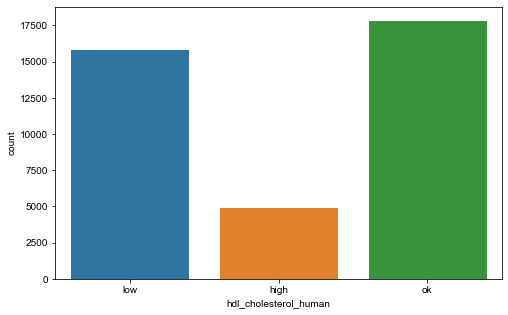

In [24]:
plt.subplots(figsize=(8, 5))
sns.set_style("whitegrid")

sns.countplot(x=additional_hdl["hdl_cholesterol_human"])

In [25]:
additional_hdl["temperature"].mean()

42.050849612403105

In [26]:
additional_hdl.describe()

donation_id   scan_number           std   temperature      humidity  \
count  38700.000000  38700.000000  38700.000000  38700.000000  38700.000000   
mean    7260.201550     30.500000      0.009686     42.050850     39.611769   
std     3168.446904     17.318326      0.005915      3.463719      9.113843   
min     1974.000000      1.000000      0.002400     28.010000     15.890000   
25%     4368.000000     15.750000      0.005100     39.420000     33.567500   
50%     7577.000000     30.500000      0.008000     41.800000     38.670000   
75%    10118.000000     45.250000      0.013300     44.310000     45.670000   
max    11966.000000     60.000000      0.030000     53.680000     70.760000   

       hdl_cholesterol_value  
count           38700.000000  
mean               49.881691  
std                16.056722  
min                15.750000  
25%                41.000000  
50%                46.000000  
75%                55.800000  
max               176.699050

<AxesSubplot:xlabel='donation_id', ylabel='temperature'>

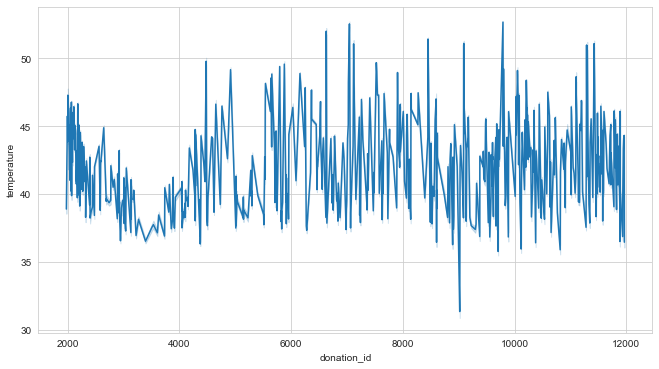

In [27]:
plt.subplots(figsize=(11, 6))
sns.set_style("whitegrid")

sns.lineplot(data=additional_hdl, x="donation_id", y="temperature")

<AxesSubplot:xlabel='temperature', ylabel='humidity'>

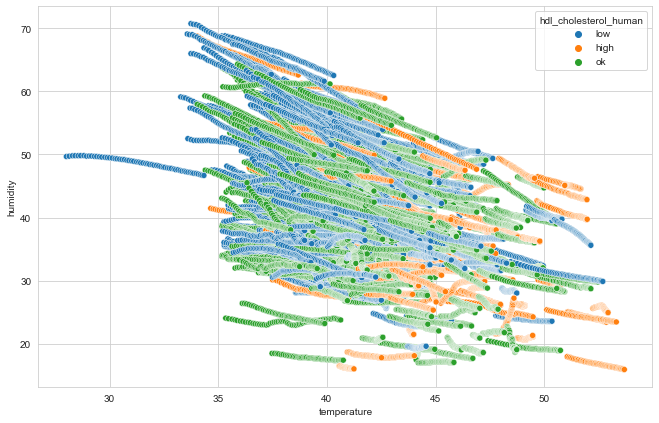

In [28]:
plt.subplots(figsize=(11, 7))
sns.set_style("whitegrid")

sns.scatterplot(data=additional_hdl, x="temperature", y="humidity", hue="hdl_cholesterol_human")

In [29]:
additional_hdl[additional_hdl["temperature"] == 28.010000]

donation_id  scan_number  \
14340         9018            1   

                                              absorbance     std  temperature  \
14340  0.56719814474968 0.57566677587154 0.5760599744...  0.0196        28.01   

       humidity hdl_cholesterol_human  hdl_cholesterol_value  
14340     49.67                   low                   33.1

In [30]:
additional_hdl[ additional_hdl["temperature"] >= 53.680000 ]

donation_id  scan_number  \
20219         7043           60   

                                              absorbance     std  temperature  \
20219  0.53330654788752 0.5391597525359 0.53942716480...  0.0115        53.68   

       humidity hdl_cholesterol_human  hdl_cholesterol_value  
20219     15.89                  high                   65.2

<AxesSubplot:xlabel='temperature', ylabel='Density'>

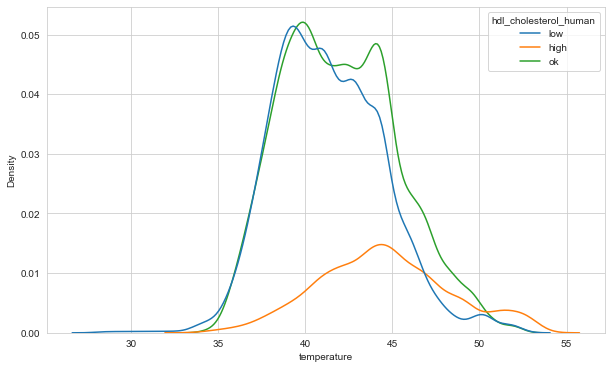

In [31]:
plt.subplots(figsize=(10, 6))

sns.set_style("whitegrid")
sns.kdeplot(data=additional_hdl, x="temperature", hue="hdl_cholesterol_human")

<AxesSubplot:xlabel='hdl_cholesterol_value', ylabel='Density'>

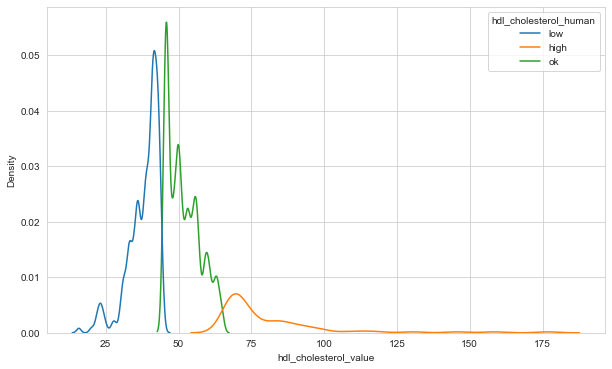

In [32]:
plt.subplots(figsize=(10, 6))
sns.set_style("whitegrid")
sns.kdeplot(data=additional_hdl, x="hdl_cholesterol_value", hue="hdl_cholesterol_human")

we have temperature value of 28.01 and hdl_cholesterol_value of 33.1
we have temperature value of 42.75 and hdl_cholesterol_value of 42

<AxesSubplot:xlabel='hdl_cholesterol_value', ylabel='temperature'>

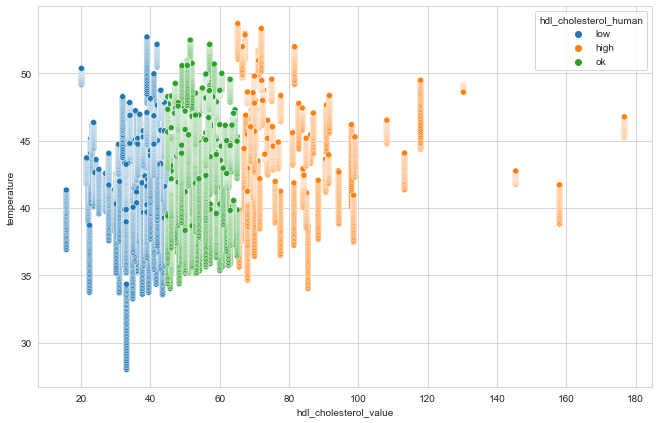

In [33]:
plt.subplots(figsize=(11, 7))
sns.set_style("whitegrid")

sns.scatterplot(data=additional_hdl, x="hdl_cholesterol_value", y="temperature", hue="hdl_cholesterol_human")

as the hdl_cholesterol_value are in categories, low hdl_cholesterol_values correspond to low_hdl_cholesterol_human, likewise high hdl_cholesterol_value

<AxesSubplot:xlabel='temperature'>

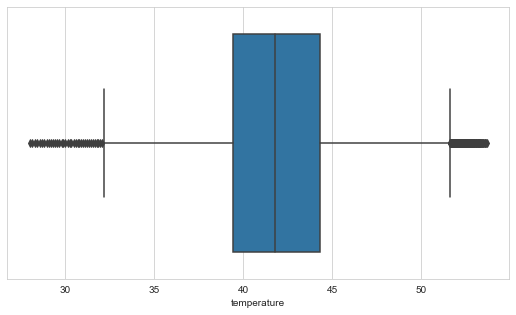

In [34]:
plt.subplots(figsize=(9, 5))
sns.set_style("whitegrid")

sns.boxplot(data=additional_hdl, x="temperature")

<AxesSubplot:xlabel='hdl_cholesterol_value'>

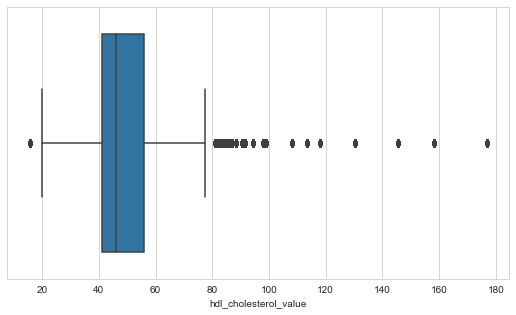

In [35]:
plt.subplots(figsize=(9, 5))
sns.set_style("whitegrid")

sns.boxplot(data=additional_hdl, x="hdl_cholesterol_value")

create boolean mask for temperature and hdl_cholesterol_value and out the values that are outliers

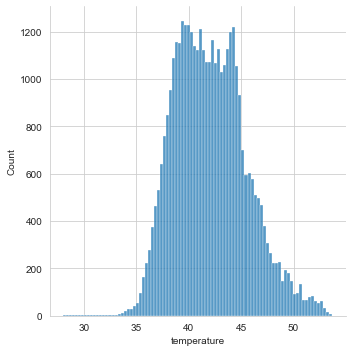

In [36]:
sns.set_style("whitegrid")

sns.displot(data=additional_hdl, x="temperature")

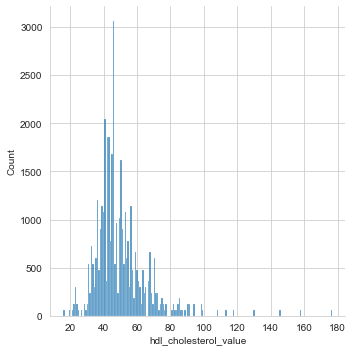

In [37]:
sns.set_style("whitegrid")

sns.displot(data=additional_hdl, x="hdl_cholesterol_value")

## Removing outliers from Temperature and Cholesterol Value

In [38]:
outlier_temp = out_iqr(additional_hdl["temperature"], k=0.5)
additional_hdl["outlier_temp"] = outlier_temp

Text(0.5, 1.0, 'temperature without outliers')

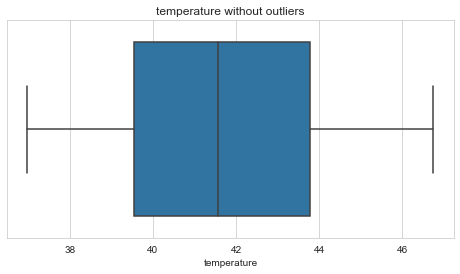

In [39]:
plt.subplots(figsize=(8, 4))
sns.set_style("whitegrid")

sns.boxplot(data=additional_hdl[additional_hdl["outlier_temp"] == False], x="temperature" )
plt.title("temperature without outliers")

In [40]:
outlier_cholesterol_value = out_iqr(additional_hdl["hdl_cholesterol_value"], k=1)
additional_hdl["outlier_hdl_cholesterol_value"] = outlier_cholesterol_value

Text(0.5, 1.0, 'cholesterol without outliers')

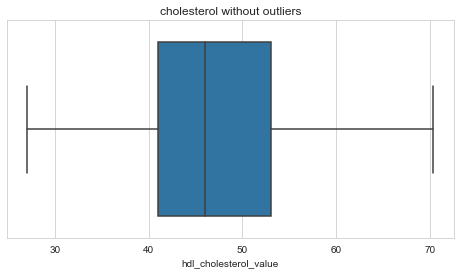

In [41]:
plt.subplots(figsize=(8, 4))
sns.set_style("whitegrid")

sns.boxplot(data=additional_hdl[additional_hdl["outlier_hdl_cholesterol_value"] == False], x="hdl_cholesterol_value" )
plt.title("cholesterol without outliers")

In [42]:
additional_hdl["outlier_temp"].value_counts()

# for temperature we are to remove 5489 scans

False    33211
True      5489
Name: outlier_temp, dtype: int64

In [43]:
additional_hdl["outlier_hdl_cholesterol_value"].value_counts()

# for hdl_cholesterol_value, we have to remove 3720

False    34980
True      3720
Name: outlier_hdl_cholesterol_value, dtype: int64

Text(0.5, 1.0, 'Temp and hdl_cholesterol_value without outliers')

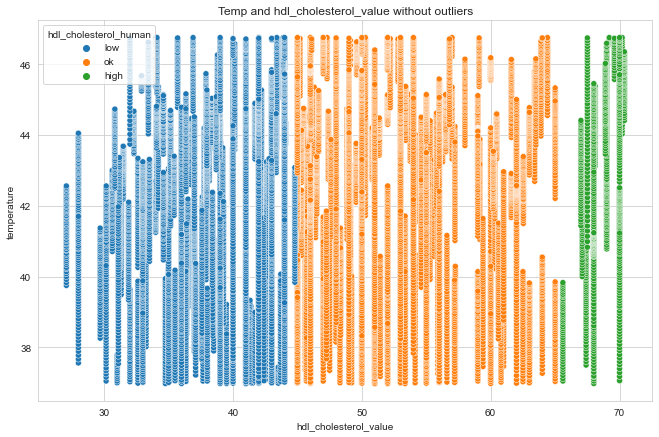

In [44]:
plt.subplots(figsize=(11, 7))
sns.set_style("whitegrid")

sns.scatterplot(data=additional_hdl[(additional_hdl["outlier_hdl_cholesterol_value"] == False) & (additional_hdl["outlier_temp"] == False)], x="hdl_cholesterol_value", y="temperature", hue="hdl_cholesterol_human")
plt.title("Temp and hdl_cholesterol_value without outliers")

<AxesSubplot:xlabel='donation_id', ylabel='temperature'>

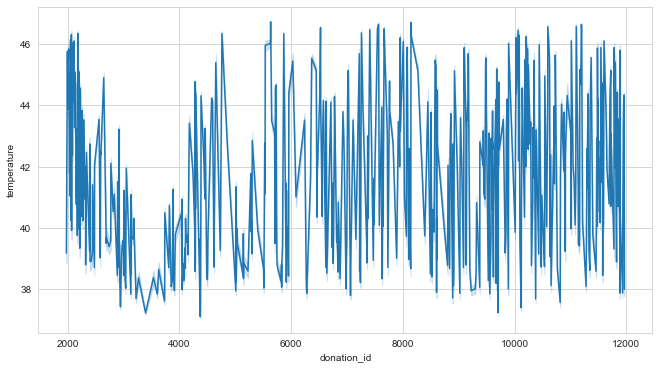

In [45]:
plt.subplots(figsize=(11, 6))
sns.set_style("whitegrid")

sns.lineplot(data=additional_hdl[additional_hdl["outlier_temp"]==False], x="donation_id", y="temperature")

- We have a little bit of outliers for hdl_cholesterol_value
- We also have outliers for temperatures

## Additional HGB 2457

In [46]:
additional_hgb_2457.head(3)

donation_id  scan_number  \
0        11980            1   
1        11980            2   
2        11980            3   

                                          absorbance     std  temperature  \
0  0.4959743239846 0.50265531863786 0.50046360501...  0.0055        38.98   
1  0.48744931864122 0.48728389763542 0.4948631880...  0.0055        39.10   
2  0.48809298618625 0.49201392749576 0.4972995630...  0.0055        39.20   

   humidity hemoglobin(hgb)_human  hemoglobin(hgb)_value  
0     56.74                    ok                   13.7  
1     56.65                    ok                   13.7  
2     56.51                    ok                   13.7

In [47]:
additional_hgb_2457["hemoglobin(hgb)_human"].value_counts()

# ok      24840 / 142,860
# high     2520 / 22,560
# low      1800 / 11,160


ok      118020
high     20040
low       9360
Name: hemoglobin(hgb)_human, dtype: int64

In [48]:
additional_hgb_2457["absorbance"]

0         0.4959743239846 0.50265531863786 0.50046360501...
1         0.48744931864122 0.48728389763542 0.4948631880...
2         0.48809298618625 0.49201392749576 0.4972995630...
3         0.48558405672497 0.4944248721165 0.49632337228...
4         0.50536069637405 0.49816445879949 0.5007495027...
                                ...                        
147415    0.52722527156868 0.53531139271876 0.5391206037...
147416    0.52964545532302 0.53300601293282 0.5412998710...
147417    0.52995212438265 0.53956241703205 0.5399136501...
147418    0.52891798302019 0.53188016066611 0.5397610287...
147419    0.5320792015995 0.53536750094228 0.54103451595...
Name: absorbance, Length: 147420, dtype: object

In [49]:
additional_hgb_2457.shape

(147420, 8)

In [50]:
additional_hgb_2457.describe()

donation_id    scan_number            std    temperature  \
count  147420.000000  147420.000000  147420.000000  147420.000000   
mean     7733.217338      30.500000       0.012447      42.835710   
std      2574.171237      17.318161       0.006539       3.652656   
min      1964.000000       1.000000       0.001900      27.980000   
25%      5759.000000      15.750000       0.007100      40.200000   
50%      7787.000000      30.500000       0.011200      42.670000   
75%      9975.000000      45.250000       0.016600      45.330000   
max     11980.000000      60.000000       0.030000      54.830000   

            humidity  hemoglobin(hgb)_value  
count  147420.000000          147420.000000  
mean       33.844767              13.721429  
std         9.575923               1.788427  
min        13.570000               4.830000  
25%        26.200000              12.600000  
50%        33.830000              13.700000  
75%        39.800000              14.900000  
max        73.920000              23.700000

In [51]:
additional_hgb_2457.columns

Index(['donation_id', 'scan_number', 'absorbance', 'std', 'temperature',
       'humidity', 'hemoglobin(hgb)_human', 'hemoglobin(hgb)_value'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of hgb')

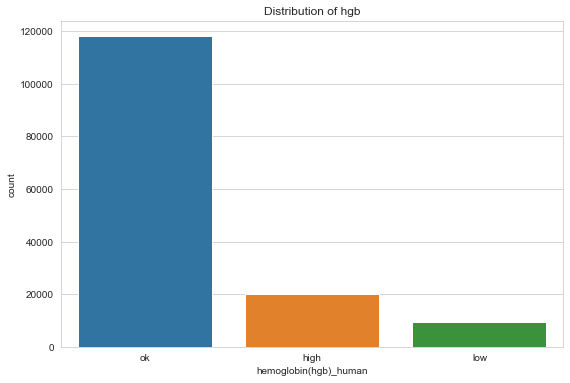

In [52]:
plt.subplots(figsize=(9,6))
sns.set_style("whitegrid")

sns.countplot(data=additional_hgb_2457, x="hemoglobin(hgb)_human")
plt.title("Distribution of hgb")

<AxesSubplot:xlabel='donation_id', ylabel='temperature'>

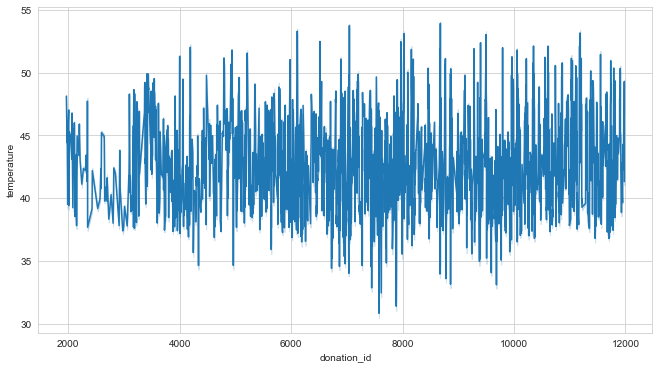

In [53]:
plt.subplots(figsize=(11, 6))
sns.set_style("whitegrid")

sns.lineplot(data=additional_hgb_2457, x="donation_id", y="temperature")

<AxesSubplot:xlabel='temperature', ylabel='Density'>

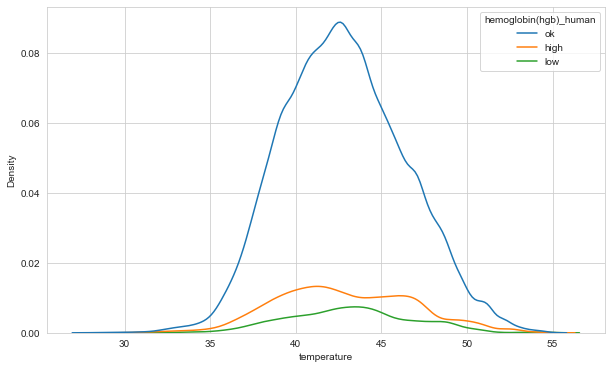

In [54]:
plt.subplots(figsize=(10, 6))

sns.set_style("whitegrid")
sns.kdeplot(data=additional_hgb_2457, x="temperature", hue="hemoglobin(hgb)_human")

<AxesSubplot:xlabel='hemoglobin(hgb)_value', ylabel='Density'>

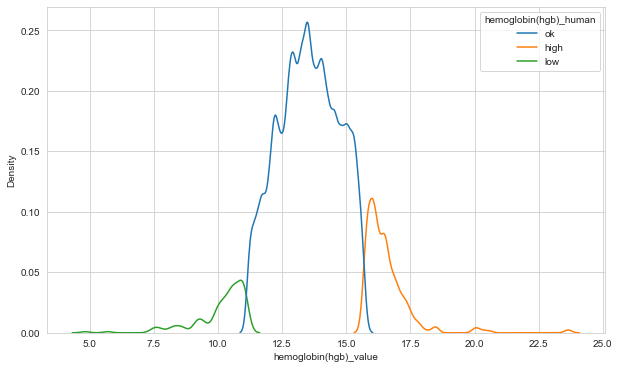

In [55]:
plt.subplots(figsize=(10, 6))

sns.set_style("whitegrid")
sns.kdeplot(data=additional_hgb_2457, x="hemoglobin(hgb)_value", hue="hemoglobin(hgb)_human")

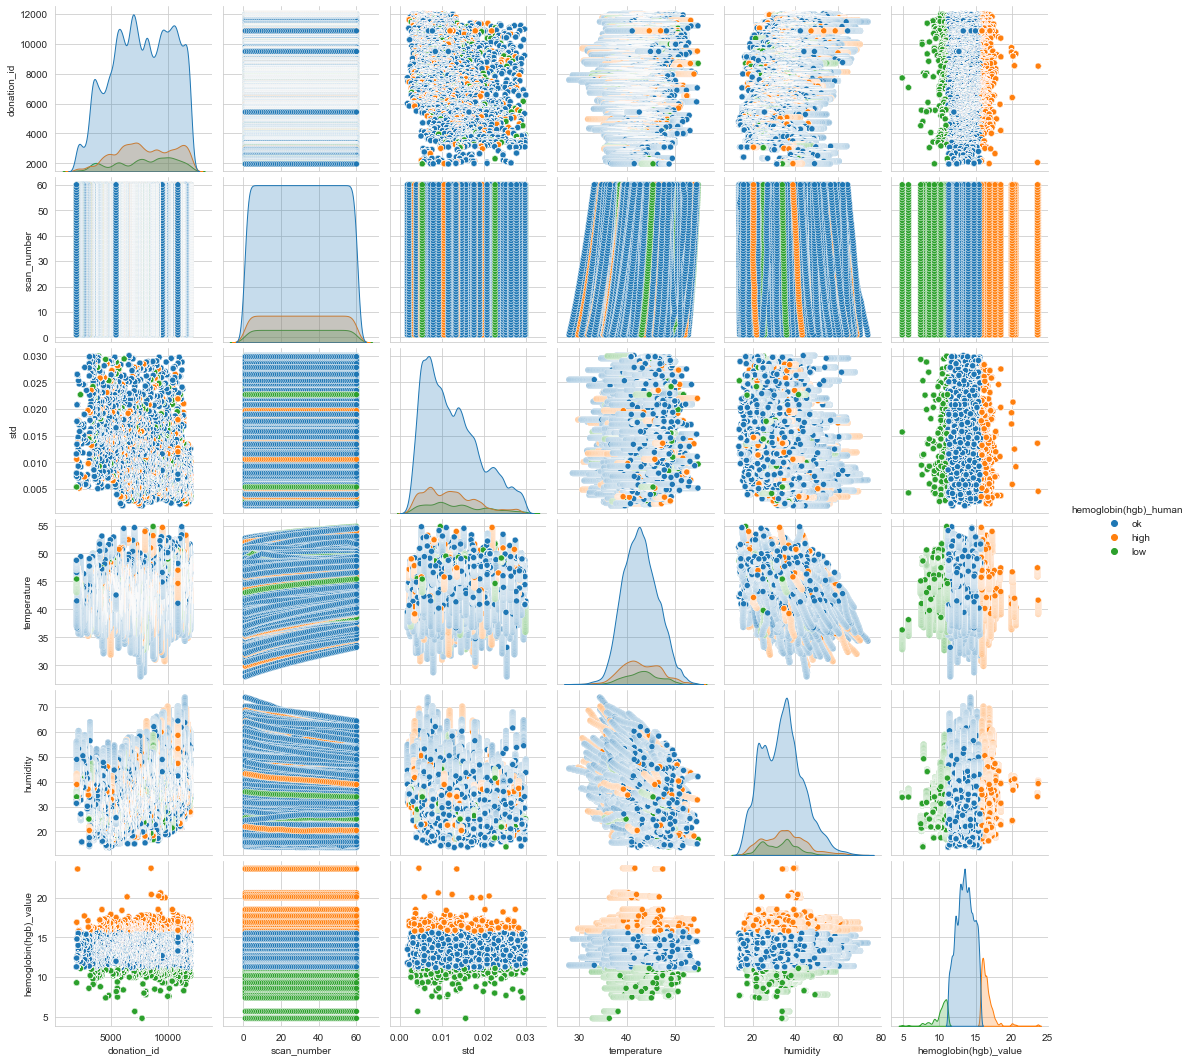

In [56]:
sns.pairplot(additional_hgb_2457, hue="hemoglobin(hgb)_human")

- temperature might not affect hgb_human, but hgb_value, affects hgb human

In [57]:
additional_hgb_2457.columns

Index(['donation_id', 'scan_number', 'absorbance', 'std', 'temperature',
       'humidity', 'hemoglobin(hgb)_human', 'hemoglobin(hgb)_value'],
      dtype='object')

<AxesSubplot:xlabel='temperature'>

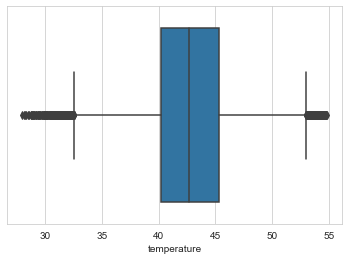

In [58]:
sns.boxplot(data=additional_hgb_2457, x="temperature")

<AxesSubplot:xlabel='hemoglobin(hgb)_value'>

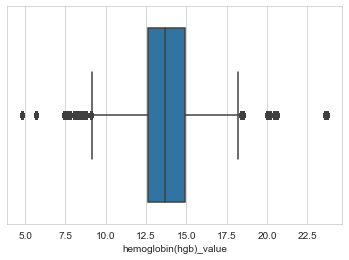

In [59]:
sns.boxplot(data=additional_hgb_2457, x="hemoglobin(hgb)_value")

In [60]:
outlier_temp_hgb = out_iqr(additional_hgb_2457["temperature"], k=1.0)
additional_hgb_2457["outlier_temp_hgb"] = outlier_temp_hgb

<AxesSubplot:xlabel='temperature'>

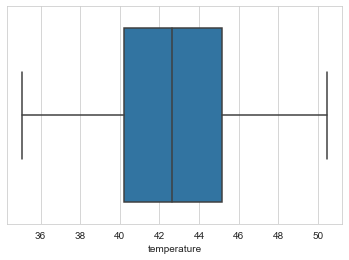

In [61]:
sns.boxplot(data=additional_hgb_2457[additional_hgb_2457["outlier_temp_hgb"] == False], x="temperature")

In [62]:
outlier_hgb_value = out_iqr(additional_hgb_2457["hemoglobin(hgb)_value"], k=1.7)
additional_hgb_2457["outlier_hgb_value"] = outlier_hgb_value

<AxesSubplot:xlabel='hemoglobin(hgb)_value'>

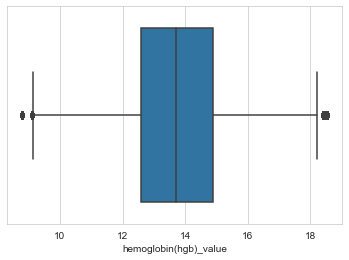

In [63]:
sns.boxplot(data=additional_hgb_2457[additional_hgb_2457["outlier_hgb_value"] == False], x="hemoglobin(hgb)_value")

In [64]:
additional_hgb_2457["outlier_hgb_value"].value_counts()

False    145860
True       1560
Name: outlier_hgb_value, dtype: int64

In [65]:
additional_hgb_2457["outlier_temp_hgb"].value_counts()

False    142726
True       4694
Name: outlier_temp_hgb, dtype: int64

<AxesSubplot:xlabel='temperature', ylabel='hemoglobin(hgb)_value'>

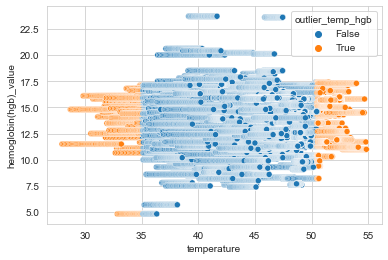

In [66]:
sns.scatterplot(data=additional_hgb_2457, x="temperature", y="hemoglobin(hgb)_value", hue="outlier_temp_hgb")

<AxesSubplot:xlabel='temperature', ylabel='hemoglobin(hgb)_value'>

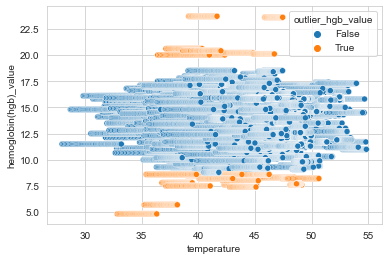

In [67]:
sns.scatterplot(data=additional_hgb_2457, x="temperature", y="hemoglobin(hgb)_value", hue="outlier_hgb_value")

<AxesSubplot:xlabel='temperature', ylabel='hemoglobin(hgb)_value'>

C:\Users\Swimming In Glory\anaconda3\envs\condaenv\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


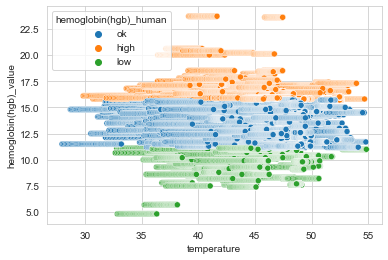

In [68]:
sns.scatterplot(data=additional_hgb_2457, x="temperature", y="hemoglobin(hgb)_value", hue="hemoglobin(hgb)_human")

# Additional LDL 135

In [69]:
additional_ldl_135.head(3)

donation_id  scan_number  \
0        10908            1   
1        10908            2   
2        10908            3   

                                          absorbance     std  temperature  \
0  0.55510412634195 0.55788763187541 0.5608186408...  0.0068        36.46   
1  0.55576159285836 0.56053079184389 0.5584783535...  0.0068        36.58   
2  0.56259720137242 0.56234323953026 0.5683397005...  0.0068        36.72   

   humidity cholesterol_ldl_human  cholesterol_ldl_value  
0     52.76                   low                   31.9  
1     52.64                   low                   31.9  
2     52.54                   low                   31.9

In [70]:
additional_ldl_135["cholesterol_ldl_human"].value_counts()

ok      4980
high    1980
low     1140
Name: cholesterol_ldl_human, dtype: int64

In [71]:
additional_ldl_135.shape

(8100, 8)

<AxesSubplot:xlabel='cholesterol_ldl_human', ylabel='count'>

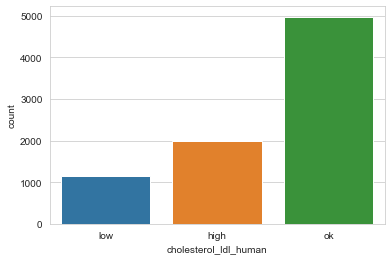

In [72]:
sns.countplot(data=additional_ldl_135, x="cholesterol_ldl_human")

# Additional LDL 410

In [73]:
additional_ldl_410.head(3)

donation_id  scan_number  \
0        11966            1   
1        11966            2   
2        11966            3   

                                          absorbance    std  temperature  \
0  0.46217816716984 0.46294401697238 0.4642270473...  0.013        33.60   
1  0.45916616200695 0.45859767737046 0.4577905533...  0.013        33.75   
2  0.47673228297037 0.48036430940931 0.4779508410...  0.013        33.87   

   humidity cholesterol_ldl_human  cholesterol_ldl_value  
0     52.51                    ok                  98.99  
1     52.35                    ok                  98.99  
2     52.24                    ok                  98.99

In [74]:
additional_ldl_410["cholesterol_ldl_human"].value_counts()

ok      14520
high     7680
low      2400
Name: cholesterol_ldl_human, dtype: int64

In [75]:
additional_ldl_410.shape

(24600, 8)

<AxesSubplot:xlabel='cholesterol_ldl_human', ylabel='count'>

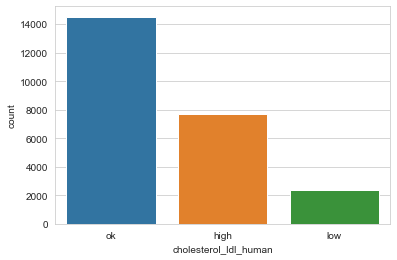

In [76]:
sns.countplot(data=additional_ldl_410, x="cholesterol_ldl_human")

# Additional LDL(Merged)

In [77]:
additional_ldl = pd.concat([additional_ldl_135, additional_ldl_410], axis=0)

additional_ldl = additional_ldl.reset_index(drop=True)

In [78]:
additional_ldl.head(3)

donation_id  scan_number  \
0        10908            1   
1        10908            2   
2        10908            3   

                                          absorbance     std  temperature  \
0  0.55510412634195 0.55788763187541 0.5608186408...  0.0068        36.46   
1  0.55576159285836 0.56053079184389 0.5584783535...  0.0068        36.58   
2  0.56259720137242 0.56234323953026 0.5683397005...  0.0068        36.72   

   humidity cholesterol_ldl_human  cholesterol_ldl_value  
0     52.76                   low                   31.9  
1     52.64                   low                   31.9  
2     52.54                   low                   31.9

In [79]:
additional_ldl.tail(3)

donation_id  scan_number  \
32697         1974           58   
32698         1974           59   
32699         1974           60   

                                              absorbance     std  temperature  \
32697  0.50743548720067 0.5093311024747 0.51146598204...  0.0102        40.87   
32698  0.50433959005825 0.5123006489633 0.51491088307...  0.0102        40.94   
32699  0.50592106137813 0.50982814612043 0.5126781494...  0.0102        41.00   

       humidity cholesterol_ldl_human  cholesterol_ldl_value  
32697     40.08                  high                  130.2  
32698     40.02                  high                  130.2  
32699     39.97                  high                  130.2

In [80]:
additional_ldl.describe()

donation_id   scan_number           std   temperature      humidity  \
count  32700.000000  32700.000000  32700.000000  32700.000000  32700.000000   
mean    6922.555963     30.500000      0.009367     42.133519     39.140313   
std     3085.669486     17.318367      0.005854      3.529956      9.050350   
min     1974.000000      1.000000      0.002400     28.010000     15.890000   
25%     4152.000000     15.750000      0.005000     39.440000     33.440000   
50%     7065.000000     30.500000      0.007500     41.800000     38.440000   
75%     9608.000000     45.250000      0.012000     44.480000     45.120000   
max    11966.000000     60.000000      0.030000     53.680000     69.110000   

       cholesterol_ldl_value  
count           32700.000000  
mean              111.430519  
std                44.146510  
min                 5.300000  
25%                81.640000  
50%               109.900000  
75%               136.120000  
max               310.800000

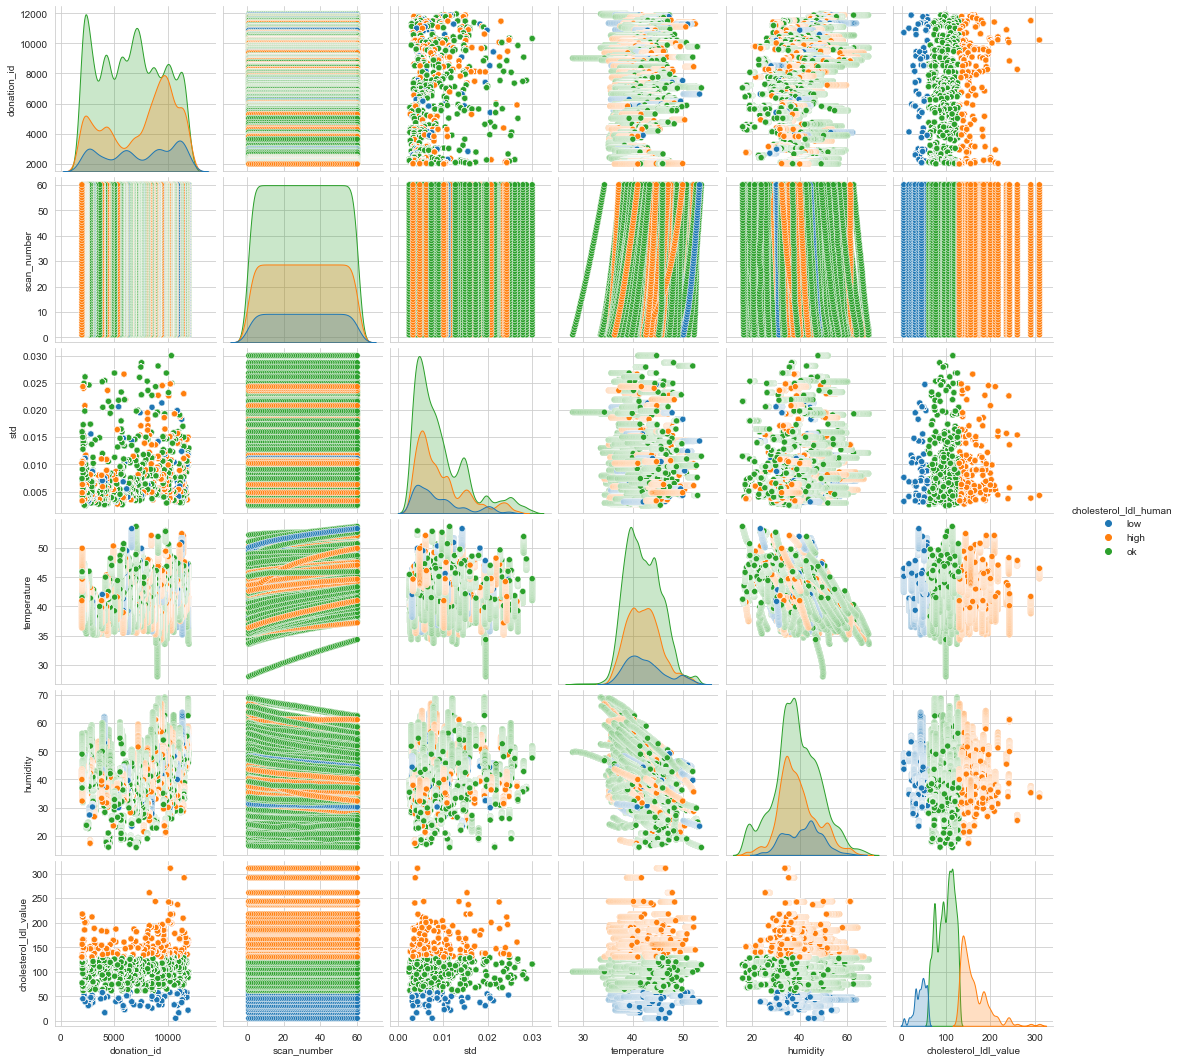

In [80]:
sns.pairplot(additional_ldl, hue="cholesterol_ldl_human")

In [81]:
additional_ldl.columns

Index(['donation_id', 'scan_number', 'absorbance', 'std', 'temperature',
       'humidity', 'cholesterol_ldl_human', 'cholesterol_ldl_value'],
      dtype='object')

<AxesSubplot:xlabel='temperature'>

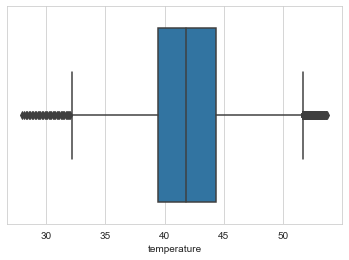

In [82]:

sns.boxplot(data=additional_hdl, x="temperature")

<AxesSubplot:xlabel='cholesterol_ldl_value'>

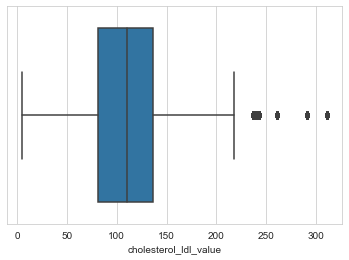

In [83]:
sns.boxplot(data=additional_ldl, x="cholesterol_ldl_value")

<AxesSubplot:xlabel='temperature'>

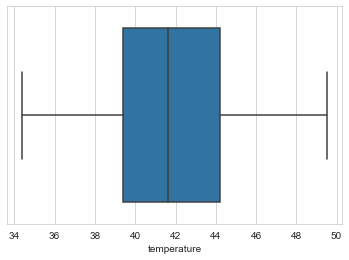

In [84]:
outlier_temp_ldl = out_iqr(additional_ldl["temperature"] , k=1.0)
additional_ldl["outlier_temp"] = outlier_temp_ldl
sns.boxplot(data=additional_ldl[additional_ldl["outlier_temp"] == False] , x="temperature")

<AxesSubplot:xlabel='cholesterol_ldl_value'>

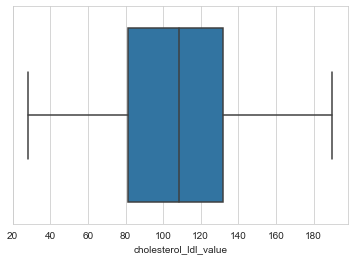

In [85]:
outlier_cholesterol_value_ldl = out_iqr(additional_ldl["cholesterol_ldl_value"], k=1.0)
additional_ldl["outlier_cholesterol"] = outlier_cholesterol_value_ldl

sns.boxplot(data=additional_ldl[additional_ldl["outlier_cholesterol"] == False] , x="cholesterol_ldl_value")

- see similarities between data, using donation_id(check if theres a donation id between the three dataframes).
- write the function to extract the absorbance values.
- Undersampling
- Filtering

## check for overlap in donation_id between additonal_datas

In [86]:
hdl_donation_id_162 = list( additional_hdl_162["donation_id"].unique() )

hdl_donation_id_483 = list( additional_hdl_483["donation_id"].unique() )

np.array( hdl_donation_id_162) == np.array( hdl_donation_id_483 )

# There's no same donation_id in the two hdl datasets

<ipython-input-86-0efefc74e66d>:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  np.array( hdl_donation_id_162) == np.array( hdl_donation_id_483 )


False

In [87]:
hdl_donation_id = list(additional_hdl["donation_id"].unique())

additional_hgb_2457_donation_id = list( additional_hgb_2457["donation_id"].unique() )

additional_ldl_donation_id = list( additional_ldl["donation_id"].unique() )

In [88]:
print( np.array( hdl_donation_id ) == np.array( additional_hgb_2457_donation_id ) )
print( np.array( additional_hgb_2457_donation_id ) == np.array( additional_ldl_donation_id ) )
print( np.array( additional_ldl_donation_id) == np.array(hdl_donation_id ) )

False
False
False


<ipython-input-88-94ad1409e021>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print( np.array( hdl_donation_id ) == np.array( additional_hgb_2457_donation_id ) )
<ipython-input-88-94ad1409e021>:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print( np.array( additional_hgb_2457_donation_id ) == np.array( additional_ldl_donation_id ) )
<ipython-input-88-94ad1409e021>:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print( np.array( additional_ldl_donation_id) == np.array(hdl_donation_id ) )


In [89]:
additional_hdl.columns

Index(['donation_id', 'scan_number', 'absorbance', 'std', 'temperature',
       'humidity', 'hdl_cholesterol_human', 'hdl_cholesterol_value',
       'outlier_temp', 'outlier_hdl_cholesterol_value'],
      dtype='object')

In [90]:
def extract_absorbance_values(absorbance_col, data, col_len, use_chunks=False):
    a = list( absorbance_col )
    row_len = len( a )
    
    column_names = []
    for i in range(col_len):
        name = f"absorbance{i}"
        column_names.append(name)

    column_names.append("nan_row") #171
    new_df = pd.DataFrame(columns=column_names) #171 columns

    for i in tqdm(range(row_len), desc="ROWS covered"):
        try:
            # we are loop through rows
            
            a_numerical = [float(i) for i in a[i].split(" ") ]
            each_row = pd.DataFrame( pd.Series( a_numerical ) ).T
            each_row.columns = column_names
            each_row["nan_row"] = False
            
        except:

            a_numerical = []
            
            for i in a[i].split(" "):
                if i == "":
                    a_numerical.append(float(0))
                else:
                    a_numerical.append(float(i))
        
            a_numerical.append(True)

            each_row = pd.DataFrame( pd.Series(a_numerical) ).T
            
            each_row.columns = column_names
            # each_row["nan_row"] = True

        new_df = pd.concat([new_df, each_row], axis=0)
        
    new_df = new_df.reset_index(drop=True)

    if use_chunks == False:
        for i in tqdm(range(col_len) , desc="LOOPING Columns"):
            data[ column_names[i] ] = new_df[ column_names[i] ]
    else:
        # for i in tqdm(range(col_len), desc="LOOPING Columns chunks"):
        #     data.loc[:, column_names[i] ] = new_df.loc[:, column_names[i]]
        pass

    return data, new_df



In [91]:
try:
    additional_hdl = pd.read_csv("additional\\additional_hdl.csv")
except:
    additional_hdl, ab = extract_absorbance_values(additional_hdl["absorbance"], additional_hdl, 170)
    additional_hdl.to_csv("additional\\additional_hdl.csv")

In [92]:
try:
    additional_ldl = pd.read_csv("additional\\additional_ldl.csv")
except:
    additional_ldl, ab = extract_absorbance_values(additional_ldl["absorbance"], additional_ldl, 170)
    additional_ldl.to_csv("additional\\additional_ldl.csv")

In [93]:
# Checking for null values in the additional_hdl & additional_ldl



print("additional_ldl:   " + str( additional_ldl.isna().sum().value_counts() ))
print("additional_hdl:   " + str( additional_hdl.isna().sum().value_counts() ))

additional_ldl:   0    181
dtype: int64
additional_hdl:   0    181
dtype: int64


In [94]:
# write a function to break things into chunks

def chunck_extract_absorbance_values(data, no_chunk):

    rows = data.shape[0]
    chunck_size = int(rows / no_chunk)

    splitted_chunks = []

    s_window = 0
    e_window = chunck_size
    
    for i in range(no_chunk):

        if i == (no_chunk-1):
            splitted_chunks.append(data.iloc[s_window:])        
        else:
            splitted_chunks.append(data.iloc[s_window:e_window])

        s_window = e_window
        e_window = e_window + chunck_size


    chunk_absorbance = []

    for i in range(no_chunk):

        # print("FUCK UP ENCOUNTERED")
        s, j = extract_absorbance_values(splitted_chunks[i]["absorbance"], splitted_chunks[i], 170, use_chunks=True)
        chunk_absorbance.append(j)
        
        splitted_chunks[i] = splitted_chunks[i].reset_index(drop=True)
        j = j.reset_index(drop=True)
        splitted_chunks[i] = pd.concat([splitted_chunks[i], j] , axis=1)


    new_df_columns = list( splitted_chunks[0].columns )
    new_df = pd.DataFrame(columns=new_df_columns)
    
    for i in range(no_chunk):

        new_df = pd.concat([new_df, splitted_chunks[i]], axis=0)
        
    new_df = new_df.reset_index(drop=True)

    return new_df

# ggg = chunck_extract_absorbance_values(test_add, 10) 
# lol = chunck_extract_absorbance_values(test_add, 10)

In [95]:
try:
    additional_hgb_2457 = pd.read_csv("additional\\additional_hgb_2457.csv")
except:
    additional_hgb_2457 = chunck_extract_absorbance_values(additional_hgb_2457, 7)
    additional_hgb_2457.to_csv("additional\\additional_hgb_2457.csv")

In [515]:
# additional_hgb_2457 = chunck_extract_absorbance_values(additional_hgb_2457, 7)

In [243]:
# additional_hgb_2457.to_csv("additional\\additional_hgb_2457.csv")

In [96]:
# Dropping ["absorbance"] columns from all the dataFrames

additional_hdl = additional_hdl.drop(["absorbance"], axis=1)
additional_ldl = additional_ldl.drop(["absorbance"], axis=1)
additional_hgb_2457 = additional_hgb_2457.drop(["absorbance"], axis=1)

In [97]:
additional_hdl.head(3)

Unnamed: 0  donation_id  scan_number     std  temperature  humidity  \
0           0        10841            1  0.0056        42.38     45.58   
1           1        10841            2  0.0056        42.48     45.47   
2           2        10841            3  0.0056        42.58     45.37   

  hdl_cholesterol_human  hdl_cholesterol_value  outlier_temp  \
0                   low                   42.2         False   
1                   low                   42.2         False   
2                   low                   42.2         False   

   outlier_hdl_cholesterol_value  ...  absorbance160  absorbance161  \
0                          False  ...       1.263782       1.264500   
1                          False  ...       1.264688       1.263147   
2                          False  ...       1.262554       1.258289   

   absorbance162  absorbance163  absorbance164  absorbance165  absorbance166  \
0       1.260582       1.241527       1.244724       1.220310       1.188683   
1       1.247994       1.243765       1.234483       1.214341       1.209225   
2       1.251042       1.247328       1.246725       1.196161       1.198100   

   absorbance167  absorbance168  absorbance169  
0       1.201894       1.233872       1.208292  
1       1.181781       1.197834       1.209063  
2       1.210783       1.217032       1.179100  

[3 rows x 180 columns]

In [98]:
additional_ldl.head(3)

Unnamed: 0  donation_id  scan_number     std  temperature  humidity  \
0           0        10908            1  0.0068        36.46     52.76   
1           1        10908            2  0.0068        36.58     52.64   
2           2        10908            3  0.0068        36.72     52.54   

  cholesterol_ldl_human  cholesterol_ldl_value  outlier_temp  \
0                   low                   31.9         False   
1                   low                   31.9         False   
2                   low                   31.9         False   

   outlier_cholesterol  ...  absorbance160  absorbance161  absorbance162  \
0                False  ...       1.332433       1.338564       1.347783   
1                False  ...       1.335764       1.333988       1.306720   
2                False  ...       1.342463       1.326266       1.329472   

   absorbance163  absorbance164  absorbance165  absorbance166  absorbance167  \
0       1.326137       1.330770       1.339941       1.359609       1.362426   
1       1.347984       1.343536       1.338133       1.331781       1.333470   
2       1.346833       1.337076       1.360504       1.335544       1.349121   

   absorbance168  absorbance169  
0       1.363026       1.342270  
1       1.327370       1.339093  
2       1.351695       1.353211  

[3 rows x 180 columns]

In [99]:
additional_hgb_2457.head(3)

Unnamed: 0  donation_id  scan_number     std  temperature  humidity  \
0           0        11980            1  0.0055        38.98     56.74   
1           1        11980            2  0.0055        39.10     56.65   
2           2        11980            3  0.0055        39.20     56.51   

  hemoglobin(hgb)_human  hemoglobin(hgb)_value  outlier_temp_hgb  \
0                    ok                   13.7             False   
1                    ok                   13.7             False   
2                    ok                   13.7             False   

   outlier_hgb_value  ...  absorbance161  absorbance162  absorbance163  \
0              False  ...       1.393573       1.370234       1.372262   
1              False  ...       1.375950       1.369943       1.386619   
2              False  ...       1.381674       1.381507       1.374040   

   absorbance164  absorbance165  absorbance166  absorbance167  absorbance168  \
0       1.401500       1.399186       1.398492       1.405417       1.397061   
1       1.375876       1.378345       1.385941       1.362914       1.472781   
2       1.394390       1.395594       1.384194       1.372872       1.403903   

   absorbance169  nan_row  
0       1.473360     True  
1       1.418044     True  
2       1.368053     True  

[3 rows x 181 columns]

## Merging all additional Data

# Normal Data(Train)

In [100]:
train = train.rename(columns={"hdl_cholesterol_human":"hdl", "hemoglobin(hgb)_human":"hgb", "cholesterol_ldl_human":"ldl"})

# hdl_cholesterol_human - hdl
# hemoglobin(hgb)_human - hgb
# cholesterol_ldl_human - ldl

In [101]:
print(train.columns)
print("")
print("")
print(train.info())

Index(['absorbance0', 'absorbance1', 'absorbance2', 'absorbance3',
       'absorbance4', 'absorbance5', 'absorbance6', 'absorbance7',
       'absorbance8', 'absorbance9',
       ...
       'absorbance168', 'absorbance169', 'id', 'std', 'temperature',
       'humidity', 'hdl', 'hgb', 'ldl', 'donation_id'],
      dtype='object', length=178)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29160 entries, 0 to 29159
Columns: 178 entries, absorbance0 to donation_id
dtypes: float64(173), int64(2), object(3)
memory usage: 39.6+ MB
None


In [102]:
train["hdl"].value_counts()

ok      14940
low      7920
high     6300
Name: hdl, dtype: int64

C:\Users\Swimming In Glory\anaconda3\envs\condaenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hdl', ylabel='count'>

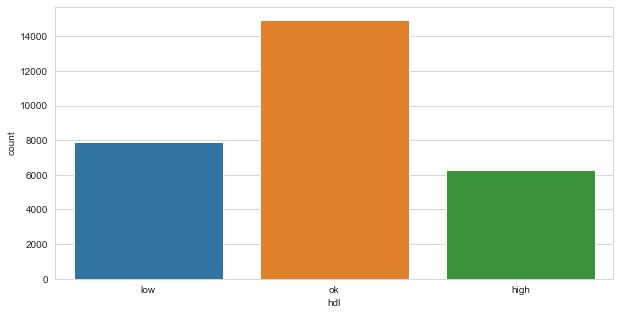

In [103]:
plt.subplots(figsize=(10, 5))

sns.set_style("whitegrid")
sns.countplot(train["hdl"])

In [104]:
train["hgb"].value_counts()

ok      24840
high     2520
low      1800
Name: hgb, dtype: int64

C:\Users\Swimming In Glory\anaconda3\envs\condaenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hgb', ylabel='count'>

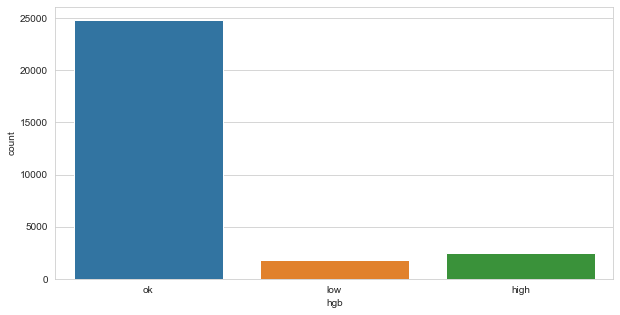

In [105]:
plt.subplots(figsize=(10, 5))
sns.set_style("whitegrid")

sns.countplot(train["hgb"])

In [106]:
train["ldl"].value_counts()

ok      15540
high    12300
low      1320
Name: ldl, dtype: int64

C:\Users\Swimming In Glory\anaconda3\envs\condaenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ldl', ylabel='count'>

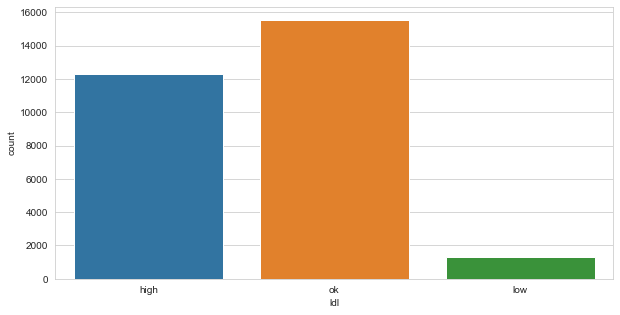

In [108]:
plt.subplots(figsize=(10, 5))
sns.set_style("whitegrid")

sns.countplot(train["ldl"])

For our target distribution, hdl seems balanced between the classes, hgb is inbalanced in two classes(ok, high), ldl is inbalanced on one class(high)

Cholesterol_hdl levels in users is balanced between low, ok, high
hemoglobin levels in users is grossly inbalanced. over 80% of users have low hamoglobin levels
patients do not have high cholesterol_ldl levels

hdl_cholesterol_human - hdl
hemoglobin(hgb)_human - hgb
cholesterol_ldl_human - ldl

In [109]:

no_patients = len( train["donation_id"].value_counts() )
no_patients
# 486 patients

486

In [110]:
train.columns

Index(['absorbance0', 'absorbance1', 'absorbance2', 'absorbance3',
       'absorbance4', 'absorbance5', 'absorbance6', 'absorbance7',
       'absorbance8', 'absorbance9',
       ...
       'absorbance168', 'absorbance169', 'id', 'std', 'temperature',
       'humidity', 'hdl', 'hgb', 'ldl', 'donation_id'],
      dtype='object', length=178)

- variation between each individual persons scans(temperature, humidity)

In [111]:
train.donation_id.values

array([2250, 2250, 2250, ..., 1994, 1994, 1994], dtype=int64)

In [112]:
patients = train.groupby(["donation_id"])
id_2250 = patients.get_group(2250)

id_2250.head(5)

absorbance0  absorbance1  absorbance2  absorbance3  absorbance4  \
0     0.520883     0.528200     0.529795     0.537382     0.540265   
1     0.529109     0.534852     0.541075     0.544269     0.546594   
2     0.528434     0.532036     0.540413     0.541964     0.549347   
3     0.530528     0.531880     0.539558     0.542433     0.549097   
4     0.527530     0.536424     0.538207     0.541504     0.550546   

   absorbance5  absorbance6  absorbance7  absorbance8  absorbance9  ...  \
0     0.546260     0.550882     0.558865     0.571352     0.585775  ...   
1     0.555183     0.561367     0.567637     0.582427     0.595801  ...   
2     0.555902     0.561458     0.567824     0.579568     0.593048  ...   
3     0.556224     0.561398     0.566963     0.577525     0.591982  ...   
4     0.555203     0.560394     0.567352     0.579438     0.592049  ...   

   absorbance168  absorbance169  id     std  temperature  humidity  hdl  hgb  \
0       1.319344       1.278294   0  0.0026        39.27     44.17  low   ok   
1       1.282723       1.267465   1  0.0026        39.39     44.09  low   ok   
2       1.287730       1.266464   2  0.0026        39.50     44.00  low   ok   
3       1.314408       1.342224   3  0.0026        39.60     43.89  low   ok   
4       1.268710       1.216146   4  0.0026        39.70     43.83  low   ok   

    ldl  donation_id  
0  high         2250  
1  high         2250  
2  high         2250  
3  high         2250  
4  high         2250  

[5 rows x 178 columns]

In [113]:
id_2250.describe()

absorbance0  absorbance1  absorbance2  absorbance3  absorbance4  \
count    60.000000    60.000000    60.000000    60.000000    60.000000   
mean      0.526054     0.530171     0.534219     0.539311     0.545288   
std       0.006087     0.006384     0.006433     0.006348     0.005805   
min       0.510847     0.517827     0.520130     0.526496     0.534783   
25%       0.522350     0.526094     0.530252     0.535054     0.540351   
50%       0.525647     0.529837     0.534116     0.539878     0.545984   
75%       0.530240     0.534891     0.538392     0.543013     0.549079   
max       0.537729     0.542735     0.546373     0.552443     0.557777   

       absorbance5  absorbance6  absorbance7  absorbance8  absorbance9  ...  \
count    60.000000    60.000000    60.000000    60.000000    60.000000  ...   
mean      0.551565     0.557454     0.564451     0.576432     0.589564  ...   
std       0.005901     0.005762     0.005850     0.005639     0.005459  ...   
min       0.540661     0.547028     0.551316     0.564283     0.577762  ...   
25%       0.546820     0.553266     0.560749     0.572842     0.586070  ...   
50%       0.552190     0.557756     0.564942     0.576797     0.588689  ...   
75%       0.555226     0.561375     0.567667     0.580058     0.593276  ...   
max       0.565607     0.571033     0.576871     0.588904     0.601022  ...   

       absorbance165  absorbance166  absorbance167  absorbance168  \
count      60.000000      60.000000      60.000000      60.000000   
mean        1.300352       1.298555       1.294824       1.295781   
std         0.018749       0.022541       0.022494       0.025798   
min         1.249103       1.244987       1.230678       1.241217   
25%         1.286727       1.282878       1.282637       1.279420   
50%         1.300114       1.297767       1.296426       1.294642   
75%         1.315795       1.312227       1.310230       1.314706   
max         1.338622       1.353629       1.348570       1.361656   

       absorbance169         id           std  temperature   humidity  \
count      60.000000  60.000000  6.000000e+01    60.000000  60.000000   
mean        1.296136  29.500000  2.600000e-03    41.531833  42.596000   
std         0.030721  17.464249  4.373407e-19     1.155660   0.785459   
min         1.192735   0.000000  2.600000e-03    39.270000  41.320000   
25%         1.279710  14.750000  2.600000e-03    40.632500  41.937500   
50%         1.298280  29.500000  2.600000e-03    41.625000  42.520000   
75%         1.317345  44.250000  2.600000e-03    42.510000  43.205000   
max         1.368193  59.000000  2.600000e-03    43.310000  44.170000   

       donation_id  
count         60.0  
mean        2250.0  
std            0.0  
min         2250.0  
25%         2250.0  
50%         2250.0  
75%         2250.0  
max         2250.0  

[8 rows x 175 columns]

In [114]:
# id_2250["hdl"].value_counts().values

print( id_2250.describe().loc["std", "temperature"] )
print( id_2250.describe().loc["std"].sort_values() )

1.1556603390309108
donation_id      0.000000e+00
std              4.373407e-19
absorbance94     2.937719e-03
absorbance93     3.021354e-03
absorbance95     3.188229e-03
                     ...     
absorbance168    2.579821e-02
absorbance169    3.072115e-02
humidity         7.854594e-01
temperature      1.155660e+00
id               1.746425e+01
Name: std, Length: 175, dtype: float64


In [115]:
donation_idx = train["donation_id"].unique()

In [116]:
# hdl_cholesterol_human - hdl
# hemoglobin(hgb)_human - hgb
# cholesterol_ldl_human - ldl

# Get patients individual dataframes to inspect for inconsistencies in data

patients_df = {}

avg_temp_per_patient = []
avg_humid_per_patient = []

for i in donation_idx:

    df = patients.get_group(i)
    patients_df[i] = df

    
    hgb_count = df["hgb"].value_counts()
    hdl_count = df["hdl"].value_counts()
    ldl_count = df["ldl"].value_counts()

    if len(hgb_count) > 1:
        print(f"ID:{i} ---- UNSTABLE hgb(hemoglobin_human) count")
    
    if len(hdl_count) > 1:
        print(f"ID:{i} ---- UNSTABLE hdl(hdl_cholesterol_human) count")
    
    if len(ldl_count) > 1:
        print(f"ID:{i} --- UNSTABLE ldl(cholesterol_ldl_human) count")
    
    temp_std = df.describe().loc["std", "temperature"]
    humidity_std = df.describe().loc["std", "humidity"]

    if temp_std > 1.5 and temp_std < 2.0:
        print(f"ID:{i} ---- UNSTABLE TEMPERATURE (between 1.5 and 2.0)")
    
    if temp_std >= 2.0:
        print(f"ID:{i} ---- UNSTABLE TEMPERATURE (above 2.0)")
    
    temp = df.describe().loc["mean", "temperature"] #get the average temperature of each patient
    humid = df.describe().loc["mean", "humidity"] #get the average humidity of each patient

    avg_temp_per_patient.append(temp)
    avg_humid_per_patient.append(humid)

# approx 13m

ID:3579 ---- UNSTABLE TEMPERATURE (between 1.5 and 2.0)
ID:5811 ---- UNSTABLE TEMPERATURE (between 1.5 and 2.0)


### AVG TEMPERATURE PER USER

<AxesSubplot:>

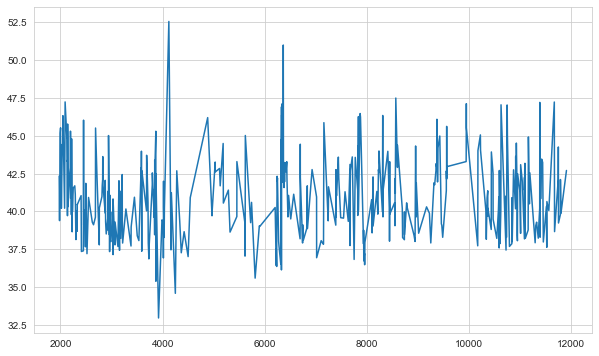

In [268]:
plt.subplots(figsize=(10, 6))
sns.set_style("whitegrid")
sns.lineplot(x=donation_idx, y=avg_temp_per_patient)

Let's take first 28 scans per id to and see how the aveerage temperature differs per id

In [269]:
avg_temp_per_patient_28 = []

for i in donation_idx:

    df = patients_df[i][0:28]

    temp = df["temperature"]
    avg_temp_per_patient_28.append(np.mean(temp))


# plt.subplots(figsize=(10, 6))
# sns.set_style("whitegrid")
# sns.lineplot(x=donation_idx, y=avg_temp_per_patient_28)

In [270]:
donation_idx[:10]

array([2250, 6316, 7148, 3068, 4541, 2968, 2133, 8790, 6395, 6370],
      dtype=int64)

In [271]:
print( np.mean(patients_df[6824][0:28]["temperature"]) )
print( np.mean(patients_df[6824]["temperature"] ))

37.957499999999996
38.89016666666667


<AxesSubplot:>

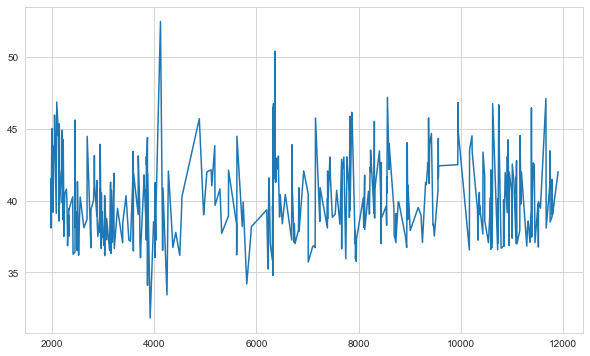

In [273]:
plt.subplots(figsize=(10, 6))
sns.set_style("whitegrid")
sns.lineplot(x=donation_idx, y=avg_temp_per_patient_28)

### AVG HUMIDITY PER PATIENT

<AxesSubplot:>

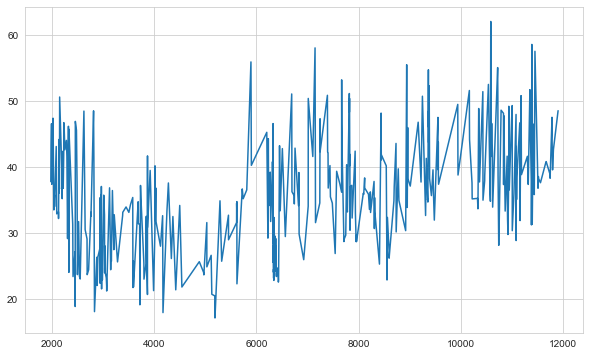

In [274]:
plt.subplots(figsize=(10, 6))
sns.set_style("whitegrid")
sns.lineplot(x=donation_idx, y=avg_humid_per_patient)

Temperature and Humidity are inversely proportional

an increase in temperature would lead to an increase in humidity

Temperature and Humidity are Noisy asf

<AxesSubplot:>

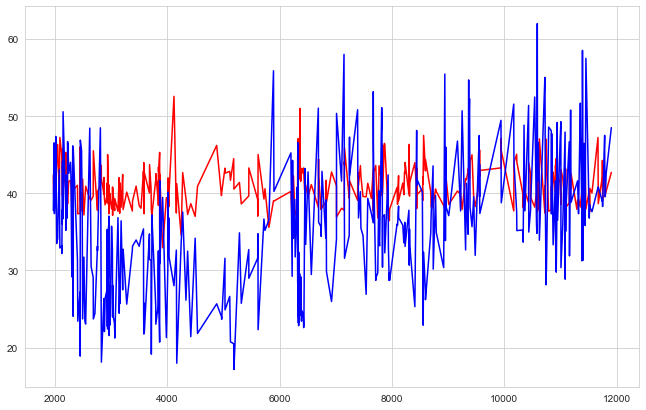

In [275]:
plt.subplots(figsize=(11, 7))
sns.set_style("whitegrid")

sns.lineplot(x=pd.Series(donation_idx), y=pd.Series(avg_temp_per_patient) , color="red")
sns.lineplot(x=pd.Series(donation_idx), y=pd.Series(avg_humid_per_patient), color="blue")

clean users with high avg temperatures
drop users with high temps

look at spectrum of high temps

<AxesSubplot:xlabel='temperature'>

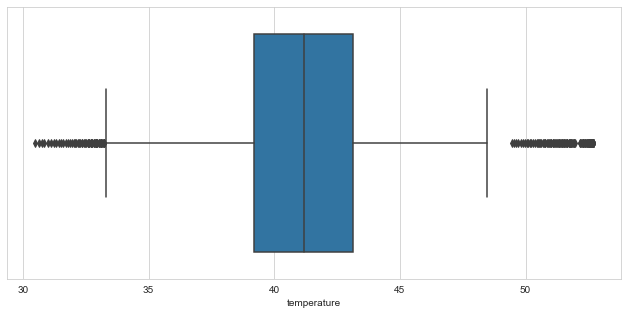

In [276]:
plt.subplots(figsize=(11, 5))
sns.boxplot(data=train, x="temperature")

<AxesSubplot:xlabel='humidity'>

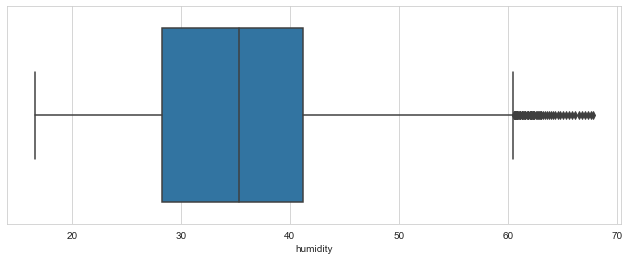

In [277]:
plt.subplots(figsize=(11, 4))
sns.boxplot(data=train, x="humidity")

In [278]:
train.columns

Index(['absorbance0', 'absorbance1', 'absorbance2', 'absorbance3',
       'absorbance4', 'absorbance5', 'absorbance6', 'absorbance7',
       'absorbance8', 'absorbance9',
       ...
       'absorbance168', 'absorbance169', 'id', 'std', 'temperature',
       'humidity', 'hdl', 'hgb', 'ldl', 'donation_id'],
      dtype='object', length=178)

<AxesSubplot:xlabel='temperature'>

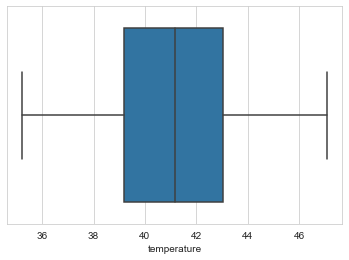

In [540]:
train_temp_outlier = out_iqr(train["temperature"] , k=1.0)
train["temp_outlier"] = train_temp_outlier

sns.boxplot(data=train[train["temp_outlier"] == False ] , x="temperature")

<AxesSubplot:xlabel='humidity'>

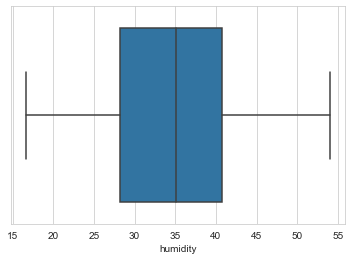

In [541]:
train_humidity_outlier = out_iqr(train["humidity"] , k=1.0)
train["humidity_outlier"] = train_humidity_outlier

sns.boxplot(data=train[train["humidity_outlier"]==False] , x="humidity")

In [542]:
print( train[(train["temp_outlier"] == False) & (train["humidity_outlier"] == False )].shape )
print( train.shape )

(27871, 180)
(29160, 180)


In [543]:
def undummify(df, prefix_sep="_"):

    cols2collapse = { item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns }

    series_list = []

    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (df.filter(like=col).idxmax(axis=1).apply(lambda x: x.split(prefix_sep, maxsplit=1)[1]).rename(col) )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    
    return undummified

In [544]:
train_no_outlier =   train[ (train["temp_outlier"] == False) & (train["humidity_outlier"] == False ) ]

train_no_outlier.shape

(27871, 180)

## MERGING ADDITIONAL DATA WITH TRAIN_DATA
- additional_hdl
- additional_hgb
- additional_ldl

### Additional hdl first

In [545]:
additional_hdl.isna().sum()

Unnamed: 0       0
donation_id      0
scan_number      0
std              0
temperature      0
                ..
absorbance165    0
absorbance166    0
absorbance167    0
absorbance168    0
absorbance169    0
Length: 180, dtype: int64

In [546]:
additional_hdl_no = additional_hdl[ (additional_hdl["outlier_temp"] == False) & (additional_hdl["outlier_hdl_cholesterol_value"] == False ) ]

In [547]:
additional_hdl_no.columns

Index(['Unnamed: 0', 'donation_id', 'scan_number', 'std', 'temperature',
       'humidity', 'hdl_cholesterol_human', 'hdl_cholesterol_value',
       'outlier_temp', 'outlier_hdl_cholesterol_value',
       ...
       'absorbance160', 'absorbance161', 'absorbance162', 'absorbance163',
       'absorbance164', 'absorbance165', 'absorbance166', 'absorbance167',
       'absorbance168', 'absorbance169'],
      dtype='object', length=180)

In [548]:
additional_hdl_cholesterol_value = additional_hdl_no.hdl_cholesterol_value

In [549]:
additional_hdl_no = additional_hdl_no.drop(["scan_number", "hdl_cholesterol_value", "outlier_temp", "outlier_hdl_cholesterol_value"], axis=1)

In [550]:
additional_hdl_no.drop(["Unnamed: 0"] , axis=1, inplace=True)

In [551]:
additional_hdl_no = additional_hdl_no.rename(columns={"hdl_cholesterol_human":"hdl"}) 

In [552]:
additional_hdl_no.columns

Index(['donation_id', 'std', 'temperature', 'humidity', 'hdl', 'absorbance0',
       'absorbance1', 'absorbance2', 'absorbance3', 'absorbance4',
       ...
       'absorbance160', 'absorbance161', 'absorbance162', 'absorbance163',
       'absorbance164', 'absorbance165', 'absorbance166', 'absorbance167',
       'absorbance168', 'absorbance169'],
      dtype='object', length=175)

In [553]:
train_hdl = train_no_outlier.drop(["hgb", "ldl", "id", "temp_outlier", "humidity_outlier"], axis=1)

In [554]:
train_hdl.columns

Index(['absorbance0', 'absorbance1', 'absorbance2', 'absorbance3',
       'absorbance4', 'absorbance5', 'absorbance6', 'absorbance7',
       'absorbance8', 'absorbance9',
       ...
       'absorbance165', 'absorbance166', 'absorbance167', 'absorbance168',
       'absorbance169', 'std', 'temperature', 'humidity', 'hdl',
       'donation_id'],
      dtype='object', length=175)

In [555]:
additional_hdl_no["hdl"].value_counts()

ok      15460
low     13474
high     1426
Name: hdl, dtype: int64

In [556]:
train_hdl["hdl"].value_counts()

ok      14307
low      7508
high     6056
Name: hdl, dtype: int64

In [557]:
print(str(6056 + 4980) + " HIGH")
print(str(15840 + 7508) + " LOW")
print(str(14307 + 17880) + " OK")

11036 HIGH
23348 LOW
32187 OK


In [558]:
train_hdl.iloc[200:400]

absorbance0  absorbance1  absorbance2  absorbance3  absorbance4  \
260     0.523923     0.528250     0.532431     0.537123     0.543507   
261     0.523301     0.528819     0.530899     0.539258     0.541631   
262     0.522060     0.524310     0.533219     0.535997     0.542739   
263     0.523631     0.528696     0.534393     0.536358     0.544230   
264     0.526241     0.526692     0.531251     0.533992     0.542995   
..           ...          ...          ...          ...          ...   
455     0.465771     0.468732     0.470926     0.480144     0.483885   
456     0.463270     0.466175     0.468590     0.475953     0.481793   
457     0.459676     0.464208     0.465336     0.475084     0.480456   
458     0.461036     0.465759     0.468092     0.472343     0.478988   
459     0.461145     0.460808     0.463792     0.471230     0.478549   

     absorbance5  absorbance6  absorbance7  absorbance8  absorbance9  ...  \
260     0.548630     0.552488     0.559288     0.567387     0.581020  ...   
261     0.548921     0.554479     0.559916     0.567747     0.580436  ...   
262     0.546804     0.552596     0.559207     0.568636     0.578937  ...   
263     0.548731     0.554917     0.558537     0.568443     0.579580  ...   
264     0.550375     0.553037     0.559554     0.569255     0.579054  ...   
..           ...          ...          ...          ...          ...  ...   
455     0.491630     0.497819     0.499981     0.508995     0.521316  ...   
456     0.488011     0.495381     0.496268     0.506800     0.518065  ...   
457     0.487209     0.492045     0.496863     0.504869     0.516624  ...   
458     0.487417     0.491334     0.494861     0.503139     0.515370  ...   
459     0.486806     0.489665     0.495618     0.504920     0.514123  ...   

     absorbance165  absorbance166  absorbance167  absorbance168  \
260       1.139949       1.126212       1.112343       1.128797   
261       1.126870       1.144053       1.116439       1.103667   
262       1.128382       1.115629       1.130087       1.115759   
263       1.145640       1.114103       1.138994       1.129198   
264       1.130458       1.114468       1.110423       1.101873   
..             ...            ...            ...            ...   
455       1.231749       1.231911       1.235650       1.221170   
456       1.222359       1.202097       1.193263       1.192353   
457       1.219123       1.195579       1.177229       1.224394   
458       1.232390       1.225995       1.198549       1.213159   
459       1.236021       1.205258       1.204910       1.221614   

     absorbance169     std  temperature  humidity  hdl  donation_id  
260       1.114310  0.0030        40.58     21.92   ok         4541  
261       1.129733  0.0030        40.63     21.93   ok         4541  
262       1.141281  0.0030        40.68     21.93   ok         4541  
263       1.128343  0.0030        40.72     21.83   ok         4541  
264       1.139723  0.0030        40.75     21.83   ok         4541  
..             ...     ...          ...       ...  ...          ...  
455       1.226594  0.0031        40.37     34.82  low         8790  
456       1.242461  0.0031        40.40     34.82  low         8790  
457       1.197411  0.0031        40.41     34.82  low         8790  
458       1.211421  0.0031        40.42     34.82  low         8790  
459       1.246228  0.0031        40.44     34.82  low         8790  

[200 rows x 175 columns]

In [559]:
additional_hdl_no = additional_hdl_no.reset_index(drop=True)

In [560]:
additional_hdl_no.iloc[500:600]

donation_id     std  temperature  humidity  hdl  absorbance0  \
500         7663  0.0058        46.34     38.74   ok     0.518414   
501         7663  0.0058        46.38     38.69   ok     0.513948   
502         7663  0.0058        46.43     38.59   ok     0.514128   
503         7663  0.0058        46.49     38.50   ok     0.523242   
504         7663  0.0058        46.53     38.49   ok     0.519143   
..           ...     ...          ...       ...  ...          ...   
595         7629  0.0043        38.35     45.12  low     0.467837   
596         7629  0.0043        38.40     45.12  low     0.466731   
597         7629  0.0043        38.45     45.08  low     0.469077   
598         7629  0.0043        38.49     45.01  low     0.462855   
599         7629  0.0043        38.55     45.00  low     0.469413   

     absorbance1  absorbance2  absorbance3  absorbance4  ...  absorbance160  \
500     0.518680     0.522387     0.527051     0.536606  ...       1.217968   
501     0.517798     0.524378     0.526865     0.540457  ...       1.224579   
502     0.517175     0.521449     0.529368     0.539134  ...       1.230977   
503     0.528759     0.528813     0.536763     0.542593  ...       1.232303   
504     0.523298     0.527796     0.534694     0.542779  ...       1.228372   
..           ...          ...          ...          ...  ...            ...   
595     0.470410     0.472451     0.476707     0.482592  ...       1.313116   
596     0.466245     0.470661     0.474260     0.480882  ...       1.318503   
597     0.468814     0.476312     0.473949     0.477542  ...       1.308311   
598     0.466039     0.469006     0.475945     0.479989  ...       1.312724   
599     0.470163     0.473789     0.476832     0.481705  ...       1.327229   

     absorbance161  absorbance162  absorbance163  absorbance164  \
500       1.232228       1.221451       1.212809       1.210205   
501       1.212292       1.236254       1.216072       1.211408   
502       1.226422       1.223729       1.215786       1.222339   
503       1.229149       1.230634       1.213134       1.214047   
504       1.222218       1.234465       1.218412       1.218922   
..             ...            ...            ...            ...   
595       1.314995       1.317988       1.317315       1.332382   
596       1.311419       1.329496       1.326801       1.338842   
597       1.317427       1.303431       1.311349       1.317911   
598       1.315182       1.319665       1.306858       1.311752   
599       1.328158       1.328508       1.318231       1.314335   

     absorbance165  absorbance166  absorbance167  absorbance168  absorbance169  
500       1.194263       1.172012       1.162381       1.149838       1.155210  
501       1.208326       1.192690       1.165305       1.157609       1.121140  
502       1.195183       1.170131       1.168057       1.142360       1.132573  
503       1.217059       1.189651       1.172120       1.149917       1.153262  
504       1.187875       1.168793       1.147495       1.146753       1.119878  
..             ...            ...            ...            ...            ...  
595       1.328031       1.358920       1.384420       1.376706       1.378987  
596       1.326062       1.315900       1.346689       1.366026       1.298254  
597       1.332312       1.326286       1.349341       1.398508       1.285044  
598       1.324572       1.322765       1.303571       1.300992       1.370873  
599       1.328662       1.337122       1.324475       1.362698       1.315204  

[100 rows x 175 columns]

In [561]:
print(additional_hdl_no.shape)
print(train_hdl.shape)
print(additional_hdl_no.shape[0] + train_hdl.shape[0])

(30360, 175)
(27871, 175)
58231


In [562]:
train_add_hdl = pd.concat([additional_hdl_no, train_hdl], axis=0)

In [563]:
train_add_hdl = train_add_hdl.reset_index(drop=True)

See if we can filter noise from the spectrum(remove fat, glucose)

In [564]:
train_add_hdl_target = train_add_hdl.hdl

In [565]:
train_add_hdl_target = pd.get_dummies(train_add_hdl["hdl"], prefix="hdl", prefix_sep="_")

train_add_hdl_target

hdl_high  hdl_low  hdl_ok
0             0        1       0
1             0        1       0
2             0        1       0
3             0        1       0
4             0        1       0
...         ...      ...     ...
58226         0        1       0
58227         0        1       0
58228         0        1       0
58229         0        1       0
58230         0        1       0

[58231 rows x 3 columns]

In [566]:
hdl_donation_idx = train_add_hdl.donation_id.unique()

In [567]:
hdl_patients = {}

train_add_hdl_patients_group = train_add_hdl.groupby("donation_id")

for i in tqdm(hdl_donation_idx):
    df = train_add_hdl_patients_group.get_group(i)
    hdl_patients[i] = df

100%|██████████| 1031/1031 [00:01<00:00, 972.40it/s]


<AxesSubplot:>

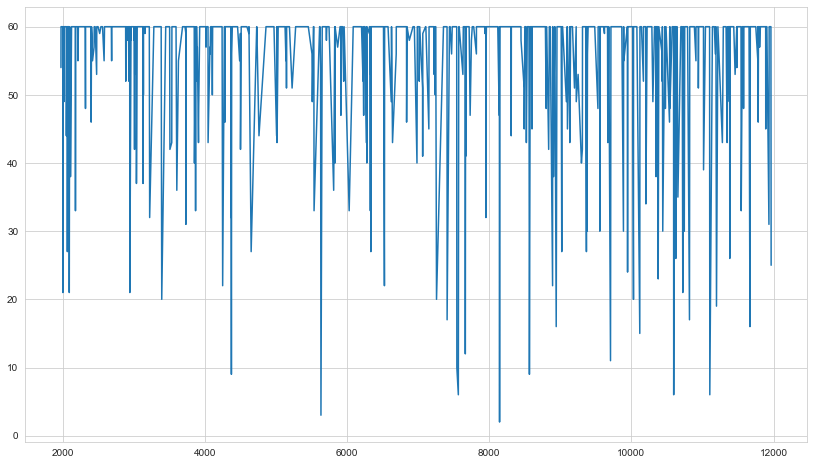

In [381]:
no_of_scans_per_id = []
for i in hdl_donation_idx:
    # print(f"ID:{i} ====> {hdl_patients[i].shape[0]}")
    no_of_scans_per_id.append(hdl_patients[i].shape[0])

plt.subplots(figsize=(14, 8))
sns.set_style("whitegrid")
sns.lineplot(x=hdl_donation_idx, y=no_of_scans_per_id) 

In [569]:
no_of_scans_per_id = pd.DataFrame({"id":pd.Series(hdl_donation_idx) , "scan_amount":pd.Series(no_of_scans_per_id)})
no_of_scans_per_id.head(2)

id  scan_amount
0  10841           60
1   9449           60

In [570]:
clean_hdl_donation_idx = no_of_scans_per_id[no_of_scans_per_id["scan_amount"] >= 40 ]["id"].values

clean_hdl_patients = {}

for i in tqdm(clean_hdl_donation_idx):
    df = train_add_hdl_patients_group.get_group(i)
    clean_hdl_patients[i] = df.iloc[:40]

100%|██████████| 965/965 [00:06<00:00, 157.90it/s]


<AxesSubplot:>

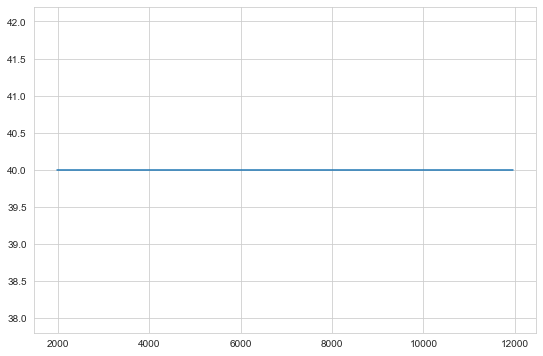

In [571]:
no_of_scans_per_id_clean_edition = []
for i in clean_hdl_donation_idx:
    # print(f"ID:{i} ====> {hdl_patients[i].shape[0]}")
    no_of_scans_per_id_clean_edition.append(clean_hdl_patients[i].shape[0])

plt.subplots(figsize=(9, 6))
sns.set_style("whitegrid")
sns.lineplot(x=clean_hdl_donation_idx, y=no_of_scans_per_id_clean_edition) 

In [572]:
def get_clean_hdl_rows(x):
    if x in clean_hdl_donation_idx:
        return True
    else:
        return False

train_add_hdl["clean_rows"] = train_add_hdl["donation_id"].apply(get_clean_hdl_rows)

train_add_hdl[train_add_hdl["clean_rows"] == True ]["donation_id"].value_counts()

2081    60
9865    60
2255    60
6349    60
6528    60
        ..
3852    40
9297    40
6983    40
6278    40
5830    40
Name: donation_id, Length: 965, dtype: int64

In [573]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [574]:
train_add_hdl = train_add_hdl[ train_add_hdl["clean_rows"] == True ]

In [3]:
train_add_hdl_idx, test_add_hdl_idx = train_test_split(clean_hdl_donation_idx, test_size=0.3, random_state=0)

def get_train_rows(x):
    if x in train_add_hdl_idx:
        return True
    else:
        return False

train_add_hdl["train_set"] = train_add_hdl["donation_id"].apply(get_train_rows)

NameError: name 'train_test_split' is not defined

In [576]:
train_add_hdl.head(2)

donation_id     std  temperature  humidity  hdl  absorbance0  absorbance1  \
0        10841  0.0056        42.38     45.58  low     0.522818     0.519492   
1        10841  0.0056        42.48     45.47  low     0.519231     0.522352   

   absorbance2  absorbance3  absorbance4  ...  absorbance162  absorbance163  \
0     0.526442     0.532444     0.535322  ...       1.260582       1.241527   
1     0.522907     0.529875     0.535889  ...       1.247994       1.243765   

   absorbance164  absorbance165  absorbance166  absorbance167  absorbance168  \
0       1.244724       1.220310       1.188683       1.201894       1.233872   
1       1.234483       1.214341       1.209225       1.181781       1.197834   

   absorbance169  clean_rows  train_set  
0       1.208292        True       True  
1       1.209063        True       True  

[2 rows x 177 columns]

In [577]:
# TRAIN_SET columns

train_add_hdl_donation_id = train_add_hdl[train_add_hdl["train_set"] == True].donation_id
train_add_hdl_temperture = train_add_hdl[train_add_hdl["train_set"] == True].temperature
train_add_hdl_humidity = train_add_hdl[train_add_hdl["train_set"] == True].humidity
train_add_hdl_hdl = train_add_hdl[train_add_hdl["train_set"] == True].hdl
train_add_hdl_clean_rows = train_add_hdl[train_add_hdl["train_set"] == True].clean_rows
train_add_hdl_train_set = train_add_hdl[train_add_hdl["train_set"] == True].train_set 

# TEST_SET columns

test_add_hdl_donation_id = train_add_hdl[train_add_hdl["train_set"] == False].donation_id
test_add_hdl_temperture = train_add_hdl[train_add_hdl["train_set"] == False].temperature
test_add_hdl_humidity = train_add_hdl[train_add_hdl["train_set"] == False].humidity
test_add_hdl_hdl = train_add_hdl[train_add_hdl["train_set"] == False].hdl
test_add_hdl_clean_rows = train_add_hdl[train_add_hdl["train_set"] == False].clean_rows
test_add_hdl_train_set = train_add_hdl[train_add_hdl["train_set"] == False].train_set 

In [578]:
train_add_hdl = train_add_hdl.drop(["donation_id", "temperature", "humidity", "hdl", "clean_rows", "std"], axis=1)

train_add_hdl.head(2)

absorbance0  absorbance1  absorbance2  absorbance3  absorbance4  \
0     0.522818     0.519492     0.526442     0.532444     0.535322   
1     0.519231     0.522352     0.522907     0.529875     0.535889   

   absorbance5  absorbance6  absorbance7  absorbance8  absorbance9  ...  \
0     0.544064     0.549396     0.552642     0.558084     0.568863  ...   
1     0.541123     0.546886     0.550454     0.558756     0.567580  ...   

   absorbance161  absorbance162  absorbance163  absorbance164  absorbance165  \
0       1.264500       1.260582       1.241527       1.244724       1.220310   
1       1.263147       1.247994       1.243765       1.234483       1.214341   

   absorbance166  absorbance167  absorbance168  absorbance169  train_set  
0       1.188683       1.201894       1.233872       1.208292       True  
1       1.209225       1.181781       1.197834       1.209063       True  

[2 rows x 171 columns]

In [579]:
pca_comp = PCA(n_components=40)

pca_train_add_hdl = pca_comp.fit_transform(train_add_hdl[train_add_hdl["train_set"] == True])
pca_test_add_hdl = pca_comp.transform(train_add_hdl[train_add_hdl["train_set"] == False ] )

In [2]:
pca_train_add_hdl = pd.DataFrame(pca_train_add_hdl)
pca_train_add_hdl.head(3)

NameError: name 'pd' is not defined

In [581]:
pd.DataFrame(pca_test_add_hdl)

0         1         2         3         4         5         6   \
0     -0.648084  0.652260  0.323413 -0.063525  0.092188 -0.003487 -0.026315   
1     -0.670551  0.666198  0.359904 -0.045849  0.085828  0.004413 -0.001519   
2     -0.639596  0.654126  0.315688 -0.062394  0.085944 -0.004561 -0.026618   
3     -0.640687  0.669848  0.281880 -0.095483  0.098555 -0.007176 -0.024820   
4     -0.672615  0.684012  0.316821 -0.059464  0.085395  0.001498 -0.004823   
...         ...       ...       ...       ...       ...       ...       ...   
17021  0.466267 -0.451846  0.059895 -0.037090  0.004871  0.005584 -0.004348   
17022  0.453484 -0.455253  0.088104 -0.007308 -0.004935  0.013494  0.024497   
17023  0.471307 -0.474642  0.047162 -0.029732  0.008174  0.012919 -0.008450   
17024  0.465568 -0.466406  0.054235 -0.041026  0.011167  0.012324  0.012552   
17025  0.269547 -0.424986  0.144404 -0.015466  0.021604  0.015438  0.024125   

             7         8         9   ...        30        31        32  \
0     -0.004540  0.031142 -0.004801  ... -0.004294 -0.004880  0.006577   
1     -0.006483 -0.000544  0.035200  ...  0.010749  0.003180  0.011338   
2      0.006623 -0.002729  0.049651  ... -0.004642 -0.001189  0.005398   
3     -0.002333  0.016677  0.015011  ...  0.001864  0.000016 -0.001983   
4      0.020148  0.034362 -0.003833  ... -0.000630  0.001758 -0.001753   
...         ...       ...       ...  ...       ...       ...       ...   
17021  0.027147 -0.005188  0.028746  ...  0.000698 -0.001920 -0.000377   
17022  0.025988  0.000748  0.002530  ...  0.001841  0.001879 -0.001541   
17023  0.001125 -0.013841  0.029084  ... -0.001657 -0.008196 -0.005905   
17024 -0.001128 -0.009489  0.000828  ... -0.000610 -0.001597  0.003634   
17025  0.008532 -0.003018 -0.006974  ... -0.000084  0.004345 -0.005111   

             33        34        35        36        37        38        39  
0     -0.004978 -0.002152 -0.001496 -0.010585  0.001113 -0.004974  0.001214  
1     -0.003450  0.004052  0.002612 -0.001289 -0.002733 -0.001060  0.002114  
2      0.002630  0.002985  0.004050 -0.007550 -0.001006  0.005967  0.003252  
3     -0.001801  0.009284 -0.001495 -0.001833  0.002693  0.011192  0.004336  
4      0.004836 -0.007334 -0.001213  0.007888 -0.001950 -0.003747 -0.003654  
...         ...       ...       ...       ...       ...       ...       ...  
17021  0.002051  0.001414 -0.000819 -0.002327 -0.000965 -0.005451 -0.000487  
17022  0.001285  0.003319  0.002446 -0.001103 -0.000976  0.001405  0.007027  
17023 -0.006686 -0.000795 -0.000577 -0.002150  0.002102  0.004265 -0.001474  
17024  0.004481  0.002055  0.001287  0.003647 -0.001277 -0.002905 -0.001050  
17025 -0.005035 -0.000926 -0.004227  0.003050  0.002370 -0.001003  0.000418  

[17026 rows x 40 columns]

In [423]:
39548 / 40

988.7

# END OF THIS SECTION

In [333]:
# Renaming columns: (X) Wavelength to absorbance

hgb_spectra = pd.read_csv("hemoglobin_Spectra.csv", header=1).rename(columns={"(X) Wavelength":"X" , "(Y)Absorbance Coefficient  (cm-1)":"absorbance"})
ldl_spectra = pd.read_csv("Cholesterol_Spectra.csv", header=1).rename(columns={"(X) Wavelength":"X" , "(Y)Absorbance Coefficient  (cm-1)":"absorbance"})
hdl_spectra = pd.read_csv("Glucose.csv", header=1).rename(columns={"(X) Wavelength":"X" , "(Y)Absorbance Coefficient  (cm-1)":"absorbance"})

In [334]:
hgb_spectra.head(2)

X  absorbance  Unnamed: 2  (X) Wavelength.1  \
0  900.000000    4.014902         NaN        900.000000   
1  904.733704    4.138519         NaN        904.733704   

   (Y)Absorbance Coefficient  (cm-1).1  
0                             6.432784  
1                             6.432784

In [335]:
ldl_spectra.head(2)

X  absorbance
0  900.000000    0.176312
1  904.733704    0.176036

In [336]:
hdl_spectra.head(2)

X  absorbance
0  900.000000         0.0
1  904.733704         0.0

In [337]:
## plotting spectrum data_with absorbance levels


def ab_spec(id_):
    plt.subplots(figsize=(11, 7))
    sns.set_style("whitegrid")
    id_df = patients_df[id_]

    id_df = id_df.drop(["temperature", "humidity", "hdl", "hgb", "ldl", "donation_id", "id", "std"], axis=1)

    for i in range(60):
        id_scan = id_df.iloc[i]
        id_df_scan = pd.DataFrame({"X":hgb_spectra["X"] , "absorbance":id_scan[11:-11].values })

        id_df_scan["absorbance"] = id_df_scan["absorbance"].astype("float32")

        sns.lineplot(x=pd.Series( id_df_scan["X"] ) , y=pd.Series( id_df_scan["absorbance"] ))

    
    # sns.lineplot(x=pd.Series(hgb_spectra["X"]), y=pd.Series(hgb_spectra["absorbance"]), color='red')
    # sns.lineplot(x=pd.Series(ldl_spectra["X"]), y=pd.Series(ldl_spectra["absorbance"]), color='g')
    # sns.lineplot(x=pd.Series(hdl_spectra["X"]), y=pd.Series(hdl_spectra["absorbance"]), color='y')
    
    # del id_df


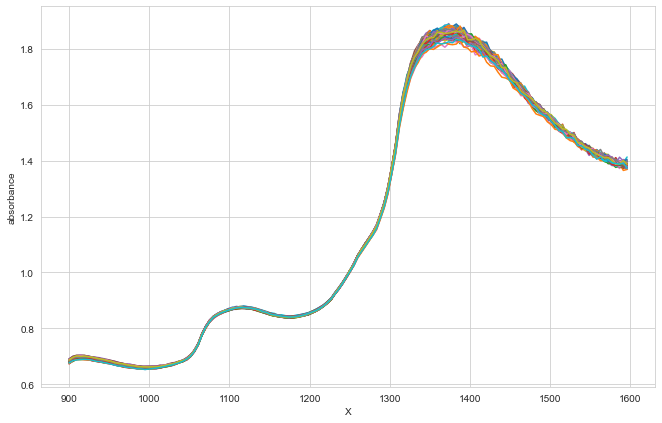

In [338]:
ab_spec(7152)

Let's pick patients
1. with low low low
2. with low low ok
3. with low low high
4. with low ok low
5. with low ok ok
6. with low ok high
with 



In [339]:
train.head(3)

absorbance0  absorbance1  absorbance2  absorbance3  absorbance4  \
0     0.520883     0.528200     0.529795     0.537382     0.540265   
1     0.529109     0.534852     0.541075     0.544269     0.546594   
2     0.528434     0.532036     0.540413     0.541964     0.549347   

   absorbance5  absorbance6  absorbance7  absorbance8  absorbance9  ...  id  \
0     0.546260     0.550882     0.558865     0.571352     0.585775  ...   0   
1     0.555183     0.561367     0.567637     0.582427     0.595801  ...   1   
2     0.555902     0.561458     0.567824     0.579568     0.593048  ...   2   

      std  temperature  humidity  hdl  hgb   ldl  donation_id  temp_outlier  \
0  0.0026        39.27     44.17  low   ok  high         2250         False   
1  0.0026        39.39     44.09  low   ok  high         2250         False   
2  0.0026        39.50     44.00  low   ok  high         2250         False   

   humidity_outlier  
0             False  
1             False  
2             False  

[3 rows x 180 columns]

In [340]:
# IDs with "low" as hdl

train[train["hdl"] == "low"]["donation_id"].unique()

array([ 2250,  6316,  2133,  8790,  3987,  2830,  2132,  2960,  5741,
        4277,  3381,  3061,  7668,  7819,  6313,  3731,  2182,  7153,
        7150,  3535,  6359,  2828,  2550,  1982,  3738,  2875,  2623,
        2220,  1989,  5189,  2896,  2876,  2449,  6362,  2933,  5127,
        4013,  3011,  6327,  2194,  3593,  9326,  3868,  5187,  3920,
        2214,  2048,  2455,  2140,  1975,  6242, 11390, 11156, 11100,
       11093, 11086, 11009, 10948, 10790, 10750, 10744, 10731, 10724,
       10606, 10592, 10591, 10588, 10542, 10433, 10169,  9566,  9562,
        9561,  9560,  9554,  9426,  9372,  9371,  9370,  8963,  8734,
        8733,  8549,  8542,  8446,  8445,  8441,  8233,  8225,  8119,
        8101,  7960,  7938,  7935,  7933,  7874,  7829,  7828,  7825,
        7781,  7771,  7571,  7449,  7406,  7241,  6824,  6756,  6742,
        6691,  6508,  6466,  6424,  6203,  5901,  5893,  5287,  4971,
        4035,  3799,  3503,  2936,  2934,  2812,  2477,  2229,  2218,
        2198,  2148,

In [341]:
len(train[train["hdl"] == "low"]["donation_id"].unique())

132

In [342]:
def con_tar_onehot(targets):

    targets = pd.get_dummies(targets)

    return targets

train_targets = con_tar_onehot(train[['hdl', 'hgb', 'ldl']])

train_targets.head(3)

hdl_high  hdl_low  hdl_ok  hgb_high  hgb_low  hgb_ok  ldl_high  ldl_low  \
0         0        1       0         0        0       1         1        0   
1         0        1       0         0        0       1         1        0   
2         0        1       0         0        0       1         1        0   

   ldl_ok  
0       0  
1       0  
2       0

In [367]:
def undummify(df, prefix_sep="_"):

    cols2collapse = { item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns }

    series_list = []

    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (df.filter(like=col).idxmax(axis=1).apply(lambda x: x.split(prefix_sep, maxsplit=1)[1]).rename(col) )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
        undummified_df = pd.concat(series_list, axis=1)
    
    return undummified_df

train_targets = undummify(train_targets)

# Absorbance Spectrum for patients with low hdl levels.

In [68]:
# for i in train[train["hdl"] == "low"]["donation_id"].unique():
#     ab_spec(i)

In [69]:
# for i in [2250, 8790, 2960, 3381, 7668, 2550, 6362, 3593, 10790]:

#     ab_spec(i)

These values with large variations in absorbance, let's check their temperature.

In [40]:
train[train["hdl"] == "high"]["donation_id"].unique()

array([ 3579,  6366,  6233,  6379,  6696,  5029,  3156,  2647,  2984,
        2536,  6375,  5030,  3448, 10625,  5454,  5453,  5619,  6326,
        3869,  2884,  7669,  6354,  6318,  3834,  3585,  6339,  6343,
        6336,  3849,  2519,  6387,  5811, 10623,  5616,  2715,  5617,
        2937,  3592,  3281,  3029,  2496,  4019,  2018, 11906, 11815,
       11798, 11750, 11747, 11668, 11561, 11523, 11520, 11513, 11420,
       11385, 11384, 11382, 11322, 11189, 11181, 11042, 10995, 10925,
       10844, 10746, 10621, 10581, 10574, 10470, 10469, 10368, 10367,
       10365, 10352, 10337, 10221,  9382,  9357,  9351,  9312,  9250,
        9012,  8736,  8698,  8598,  8597,  8314,  8311,  8309,  8303,
        8213,  8194,  8092,  7955,  7952,  7936,  7867,  7826,  7767,
        7717,  7394,  6415,  5723,  3685,  3591], dtype=int64)

Let's see the difference in absorbance spectrum when hdl is low vs when hdl is high

# Absorbance Spectrum of patients with high hdl levels

In [70]:
# for i in train[train["hdl"] == "high"]["donation_id"].unique():
#     ab_spec(i)

# Perform PCA on absorbance features

In [41]:
test.columns

Index(['Reading_ID', 'donation_id', 'absorbance0', 'absorbance1',
       'absorbance2', 'absorbance3', 'absorbance4', 'absorbance5',
       'absorbance6', 'absorbance7',
       ...
       'absorbance164', 'absorbance165', 'absorbance166', 'absorbance167',
       'absorbance168', 'absorbance169', 'id', 'std', 'temperature',
       'humidity'],
      dtype='object', length=176)

In [116]:
test_reading_id = test.Reading_ID
test_donation_id = test.donation_id
test_id = test.id
test_std = test["std"]
test_temperature = test.temperature
test_humidity = test.humidity

test_absorbance = test.drop( ["Reading_ID", "donation_id", "id", "std", "temperature", "humidity"], axis=1 )

test_absorbance.head(3)

absorbance0  absorbance1  absorbance2  absorbance3  absorbance4  \
0     0.517951     0.520508     0.526852     0.531611     0.536816   
1     0.517839     0.522367     0.525186     0.534661     0.541900   
2     0.517702     0.522018     0.527237     0.534374     0.541155   

   absorbance5  absorbance6  absorbance7  absorbance8  absorbance9  ...  \
0     0.543828     0.547761     0.554379     0.565622     0.575762  ...   
1     0.546180     0.551687     0.556753     0.566446     0.578208  ...   
2     0.547152     0.549837     0.557513     0.566793     0.580574  ...   

   absorbance160  absorbance161  absorbance162  absorbance163  absorbance164  \
0       1.234971       1.223950       1.235415       1.234605       1.226695   
1       1.232710       1.238981       1.237033       1.237152       1.219627   
2       1.239622       1.228925       1.240135       1.238346       1.237193   

   absorbance165  absorbance166  absorbance167  absorbance168  absorbance169  
0       1.210430       1.214422       1.200332       1.198297       1.248182  
1       1.216220       1.191416       1.202515       1.211942       1.242939  
2       1.208477       1.208721       1.187810       1.209599       1.175631  

[3 rows x 170 columns]

In [43]:
[i for i in test.columns if test[i].dtype == "object"]

['Reading_ID', 'donation_id']

In [44]:
train.columns

Index(['absorbance0', 'absorbance1', 'absorbance2', 'absorbance3',
       'absorbance4', 'absorbance5', 'absorbance6', 'absorbance7',
       'absorbance8', 'absorbance9',
       ...
       'absorbance168', 'absorbance169', 'id', 'std', 'temperature',
       'humidity', 'hdl', 'hgb', 'ldl', 'donation_id'],
      dtype='object', length=178)

In [45]:
train_absorbance = train.iloc[:, 0:170]

train_absorbance.head(4)

absorbance0  absorbance1  absorbance2  absorbance3  absorbance4  \
0     0.520883     0.528200     0.529795     0.537382     0.540265   
1     0.529109     0.534852     0.541075     0.544269     0.546594   
2     0.528434     0.532036     0.540413     0.541964     0.549347   
3     0.530528     0.531880     0.539558     0.542433     0.549097   

   absorbance5  absorbance6  absorbance7  absorbance8  absorbance9  ...  \
0     0.546260     0.550882     0.558865     0.571352     0.585775  ...   
1     0.555183     0.561367     0.567637     0.582427     0.595801  ...   
2     0.555902     0.561458     0.567824     0.579568     0.593048  ...   
3     0.556224     0.561398     0.566963     0.577525     0.591982  ...   

   absorbance160  absorbance161  absorbance162  absorbance163  absorbance164  \
0       1.329464       1.314664       1.313583       1.313329       1.312243   
1       1.316437       1.316180       1.316063       1.320698       1.321068   
2       1.327512       1.339627       1.322394       1.328299       1.311948   
3       1.331542       1.347718       1.321111       1.320285       1.303363   

   absorbance165  absorbance166  absorbance167  absorbance168  absorbance169  
0       1.310330       1.353629       1.336609       1.319344       1.278294  
1       1.286939       1.301804       1.314457       1.282723       1.267465  
2       1.310330       1.311108       1.283048       1.287730       1.266464  
3       1.306762       1.297632       1.314811       1.314408       1.342224  

[4 rows x 170 columns]

In [46]:
train.head(1)

absorbance0  absorbance1  absorbance2  absorbance3  absorbance4  \
0     0.520883       0.5282     0.529795     0.537382     0.540265   

   absorbance5  absorbance6  absorbance7  absorbance8  absorbance9  ...  \
0      0.54626     0.550882     0.558865     0.571352     0.585775  ...   

   absorbance168  absorbance169  id     std  temperature  humidity  hdl  hgb  \
0       1.319344       1.278294   0  0.0026        39.27     44.17  low   ok   

    ldl  donation_id  
0  high         2250  

[1 rows x 178 columns]

In [47]:
train.columns

Index(['absorbance0', 'absorbance1', 'absorbance2', 'absorbance3',
       'absorbance4', 'absorbance5', 'absorbance6', 'absorbance7',
       'absorbance8', 'absorbance9',
       ...
       'absorbance168', 'absorbance169', 'id', 'std', 'temperature',
       'humidity', 'hdl', 'hgb', 'ldl', 'donation_id'],
      dtype='object', length=178)

In [48]:
from sklearn.decomposition import PCA

# hdl, hgb, ldl

In [117]:
pca = PCA(n_components=28)

pca_model = pca.fit(train_absorbance)

train_absorbance_pca = pca_model.transform(train_absorbance)
test_absorbance_pca = pca_model.transform(test_absorbance)

In [118]:
train_absorbance_pca = pd.DataFrame( train_absorbance_pca)
test_absorbance_pca = pd.DataFrame( test_absorbance_pca )

# train

train_absorbance_pca["donation"] = train["donation_id"]
train_absorbance_pca["hdl"] = train["hdl"]
train_absorbance_pca["hgb"] = train["hgb"]
train_absorbance_pca["ldl"] = train["ldl"]
train_absorbance_pca["humidity"] = train["humidity"]
train_absorbance_pca["temperature"] = train["temperature"]
train_absorbance_pca["std"] = train["std"]
train_absorbance_pca["id"] = train["id"]

# Test
# ["Reading_ID", "donation_id", "id", "std", "temperature", "humidity"]
test_absorbance_pca["donation_id"] = test_donation_id
test_absorbance_pca["Reading_ID"] = test_reading_id
test_absorbance_pca["id"] = test_id
# test_absorbance_pca["std"] = test_std
test_absorbance_pca["temperature"] = test_temperature
test_absorbance_pca["humidity"] = test_humidity

train_absorbance_pca.head(3)

0         1         2         3         4         5         6  \
0 -0.370071 -0.193557 -0.094464 -0.024239 -0.123790 -0.020034 -0.036396   
1 -0.470032 -0.078970  0.003869 -0.033998 -0.111482  0.004496 -0.016787   
2 -0.493376 -0.055672  0.007511 -0.039038 -0.122868 -0.004894 -0.015604   

          7         8         9  ...        26        27  donation  hdl  hgb  \
0 -0.003451 -0.021514 -0.008444  ...  0.002140  0.009212      2250  low   ok   
1 -0.022712 -0.011383 -0.012992  ... -0.001716 -0.008189      2250  low   ok   
2 -0.033149  0.018439 -0.008560  ...  0.004956  0.005231      2250  low   ok   

    ldl  humidity  temperature     std  id  
0  high     44.17        39.27  0.0026   0  
1  high     44.09        39.39  0.0026   1  
2  high     44.00        39.50  0.0026   2  

[3 rows x 36 columns]

In [119]:
test_absorbance_pca.head(3)

0         1         2         3         4         5         6  \
0  0.438380 -0.470352  0.062100  0.067401 -0.060732  0.076877  0.034481   
1  0.425298 -0.466345  0.070342  0.067240 -0.060227  0.083276  0.030705   
2  0.426481 -0.471955  0.089097  0.043784 -0.049596  0.076404 -0.027680   

          7         8         9  ...        23        24        25        26  \
0 -0.024350 -0.004634 -0.003421  ...  0.007236  0.003083  0.001386  0.002203   
1 -0.013153  0.005892 -0.005179  ...  0.004086 -0.000143 -0.000537  0.002056   
2 -0.020647  0.019435 -0.001208  ...  0.004967  0.000831  0.000076 -0.002740   

         27  donation_id   Reading_ID  id  temperature  humidity  
0  0.000214      ID_2982  ID_KWUAQLRM   0        37.09     27.22  
1  0.001116      ID_2982  ID_FN8SIVJJ   1        37.20     27.17  
2  0.001329      ID_2982  ID_CI4TQCHI   2        37.30     27.07  

[3 rows x 33 columns]

In [120]:
assert train_absorbance_pca.shape[0] == train.shape[0], "train_absorbance_pca.shape != train.shape"

In [121]:
pca_patients = train_absorbance_pca.groupby(["donation"])
pca_test_patients = test_absorbance_pca.groupby(["donation_id"])

In [122]:
pca_patients_df = {}
pca_patients_test_df = {}


for i in donation_idx:
    # this is for train_data
    df = pca_patients.get_group(i)
    pca_patients_df[i] = df

for i in test_donation_id.values:
    # this is for test_data
    df = pca_test_patients.get_group(i)
    pca_patients_test_df[i] = df

In [123]:
donation_idx[0:10]

array([2250, 6316, 7148, 3068, 4541, 2968, 2133, 8790, 6395, 6370],
      dtype=int64)

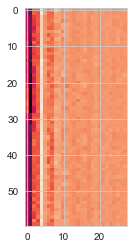

In [124]:
plt.imshow( pca_patients_df[3068].iloc[0:60, 0:28] )

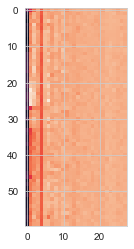

In [125]:
plt.imshow( pca_patients_df[2250].iloc[0:60, 0:28] )

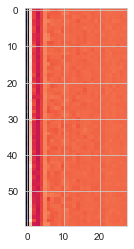

In [126]:
plt.imshow( pca_patients_df[6370].iloc[0:60, 0:28] )

In [127]:
# hdl, hgb, ldl
print( pca_patients_df[3068][["hdl", "hgb", "ldl"]].value_counts() )
print( pca_patients_df[2250][["hdl", "hgb", "ldl"]].value_counts() )
print( pca_patients_df[6370][["hdl", "hgb", "ldl"]].value_counts() )

hdl  hgb  ldl
ok   ok   low    60
dtype: int64
hdl  hgb  ldl 
low  ok   high    60
dtype: int64
hdl  hgb  ldl 
ok   ok   high    60
dtype: int64


# Let's prepare data for training

In [60]:
# def trim_scans(data, n_of_scans):
    
#     new_data = data
#     count = 0
#     for i in donation_idx:
#         print(count)
#         df = patients_df[i].iloc[n_of_scans:]
#         df_ids = df["id"].values
        
#         new_data = new_data.drop(df_ids, axis=0)
#         count = count + 1
    
#     return new_data

# cc = trim_scans(train_absorbance_pca, 28)

In [128]:
test_absorbance_pca

0         1         2         3         4         5         6  \
0     0.438380 -0.470352  0.062100  0.067401 -0.060732  0.076877  0.034481   
1     0.425298 -0.466345  0.070342  0.067240 -0.060227  0.083276  0.030705   
2     0.426481 -0.471955  0.089097  0.043784 -0.049596  0.076404 -0.027680   
3     0.407344 -0.476678  0.115955  0.058637 -0.038260  0.089653  0.003397   
4     0.438438 -0.476144  0.108155  0.038912 -0.046318  0.077264  0.022970   
...        ...       ...       ...       ...       ...       ...       ...   
3655 -0.457690  0.275207 -0.293158 -0.047533  0.034535  0.023284 -0.072644   
3656 -0.509404  0.319264 -0.327238 -0.035003  0.025093  0.030390  0.024376   
3657 -0.527211  0.329697 -0.336794 -0.034008  0.024255  0.037063 -0.017757   
3658 -0.410348  0.177054 -0.320529 -0.029342  0.047873  0.043002 -0.035292   
3659 -0.608074  0.298868 -0.257862 -0.046726  0.062466  0.058253 -0.015163   

             7         8         9  ...        23        24        25  \
0    -0.024350 -0.004634 -0.003421  ...  0.007236  0.003083  0.001386   
1    -0.013153  0.005892 -0.005179  ...  0.004086 -0.000143 -0.000537   
2    -0.020647  0.019435 -0.001208  ...  0.004967  0.000831  0.000076   
3    -0.030601 -0.012392 -0.026344  ...  0.008450 -0.001072  0.006572   
4    -0.040968 -0.015078 -0.012664  ...  0.015158 -0.000905 -0.002910   
...        ...       ...       ...  ...       ...       ...       ...   
3655  0.011190  0.038380 -0.022038  ...  0.000973 -0.007717  0.004649   
3656 -0.059221 -0.008255 -0.029554  ... -0.011058 -0.017486  0.003264   
3657 -0.034813  0.015892 -0.021914  ... -0.012835 -0.011643  0.014813   
3658 -0.021227  0.033953 -0.019151  ... -0.015989 -0.015937  0.004507   
3659 -0.042513  0.041517 -0.020871  ... -0.015519 -0.015794  0.006817   

            26        27  donation_id   Reading_ID    id  temperature  \
0     0.002203  0.000214      ID_2982  ID_KWUAQLRM     0        37.09   
1     0.002056  0.001116      ID_2982  ID_FN8SIVJJ     1        37.20   
2    -0.002740  0.001329      ID_2982  ID_CI4TQCHI     2        37.30   
3    -0.000232  0.000114      ID_2982  ID_URJMKNU7     3        37.38   
4    -0.004956  0.002206      ID_2982  ID_HBJH67IS     4        37.48   
...        ...       ...          ...          ...   ...          ...   
3655  0.003168 -0.004955      ID_3637  ID_HDGHLAEP  3655        40.63   
3656 -0.008047 -0.000168      ID_3637  ID_FZOHFGJT  3656        40.66   
3657 -0.007754  0.008589      ID_3637  ID_7491X84N  3657        40.70   
3658 -0.006065 -0.000617      ID_3637  ID_TAG0EZ2L  3658        40.72   
3659 -0.008306  0.000534      ID_3637  ID_MOEZYE3Q  3659        40.75   

      humidity  
0        27.22  
1        27.17  
2        27.07  
3        26.98  
4        26.89  
...        ...  
3655     36.33  
3656     36.33  
3657     36.23  
3658     36.23  
3659     36.23  

[3660 rows x 33 columns]

In [129]:
train_absorbance_pca

0         1         2         3         4         5         6  \
0     -0.370071 -0.193557 -0.094464 -0.024239 -0.123790 -0.020034 -0.036396   
1     -0.470032 -0.078970  0.003869 -0.033998 -0.111482  0.004496 -0.016787   
2     -0.493376 -0.055672  0.007511 -0.039038 -0.122868 -0.004894 -0.015604   
3     -0.523099 -0.031235 -0.034057 -0.020170 -0.126563  0.010727  0.042002   
4     -0.467472 -0.063375  0.049445 -0.054600 -0.109934 -0.011720 -0.047540   
...         ...       ...       ...       ...       ...       ...       ...   
29155  0.296843 -0.401118 -0.068091 -0.032397  0.014979  0.014182 -0.003325   
29156  0.284057 -0.403811 -0.098303 -0.004153  0.005952  0.022512  0.025634   
29157  0.300650 -0.423882 -0.056277 -0.023412  0.019763  0.018275 -0.008102   
29158  0.295422 -0.415490 -0.062463 -0.035614  0.020360  0.019429  0.012610   
29159  0.102293 -0.364771 -0.156664 -0.020073  0.026592  0.021834  0.025061   

              7         8         9  ...        26        27  donation  hdl  \
0     -0.003451 -0.021514 -0.008444  ...  0.002140  0.009212      2250  low   
1     -0.022712 -0.011383 -0.012992  ... -0.001716 -0.008189      2250  low   
2     -0.033149  0.018439 -0.008560  ...  0.004956  0.005231      2250  low   
3     -0.004951  0.006900 -0.023394  ... -0.010654 -0.002058      2250  low   
4     -0.027606  0.002163 -0.015108  ...  0.010021  0.001377      2250  low   
...         ...       ...       ...  ...       ...       ...       ...  ...   
29155  0.021456 -0.007627 -0.019571  ...  0.001108  0.006978      1994  low   
29156  0.019743  0.001261 -0.002895  ...  0.003833  0.007274      1994  low   
29157 -0.005513 -0.013810 -0.020594  ...  0.001833  0.000477      1994  low   
29158 -0.008492 -0.006841 -0.000671  ... -0.002862  0.001916      1994  low   
29159  0.000603  0.000919  0.005206  ...  0.001678 -0.001436      1994  low   

       hgb   ldl  humidity  temperature     std     id  
0       ok  high     44.17        39.27  0.0026      0  
1       ok  high     44.09        39.39  0.0026      1  
2       ok  high     44.00        39.50  0.0026      2  
3       ok  high     43.89        39.60  0.0026      3  
4       ok  high     43.83        39.70  0.0026      4  
...    ...   ...       ...          ...     ...    ...  
29155   ok  high     37.06        45.56  0.0098  36075  
29156   ok  high     37.06        45.58  0.0098  36076  
29157   ok  high     37.01        45.58  0.0098  36077  
29158   ok  high     36.97        45.60  0.0098  36078  
29159   ok  high     36.98        45.61  0.0098  36079  

[29160 rows x 36 columns]

- when we assign folds to every id
- we create a list to hold every id in the training folds
- loop through the list, get the data for every id
- convert to array and append to image_list

In [130]:
target = train_absorbance_pca[["hdl", "hgb", "ldl"]]

In [131]:
train_absorbance_pca["fold"] = -1

In [132]:
from sklearn.model_selection import GroupKFold

group_k_fold = GroupKFold(n_splits=5)
# group_k_fold.get_n_splits(train, target, groups)

groups = train.donation_id

for fold, (train_idx, val_idx) in enumerate(group_k_fold.split(train_absorbance_pca, target, groups=groups)):
    print(f"FOLD:{fold} ------- TRAIN_IDX:{train_idx} ---------- VAL_IDX:{val_idx} ")
    print("")
    print("")
    train_absorbance_pca.loc[val_idx, "fold"] = fold
    target.loc[val_idx, "fold"] = fold

FOLD:0 ------- TRAIN_IDX:[    0     1     2 ... 29157 29158 29159] ---------- VAL_IDX:[  420   421   422 ... 28977 28978 28979] 


FOLD:1 ------- TRAIN_IDX:[    0     1     2 ... 29157 29158 29159] ---------- VAL_IDX:[  240   241   242 ... 28797 28798 28799] 


FOLD:2 ------- TRAIN_IDX:[    0     1     2 ... 29097 29098 29099] ---------- VAL_IDX:[  480   481   482 ... 29157 29158 29159] 


FOLD:3 ------- TRAIN_IDX:[  180   181   182 ... 29157 29158 29159] ---------- VAL_IDX:[    0     1     2 ... 29097 29098 29099] 


FOLD:4 ------- TRAIN_IDX:[    0     1     2 ... 29157 29158 29159] ---------- VAL_IDX:[  180   181   182 ... 29037 29038 29039] 




C:\Users\Swimming In Glory\anaconda3\envs\condaenv\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Swimming In Glory\anaconda3\envs\condaenv\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [133]:
target_29160_rows = con_tar_onehot( train_absorbance_pca[["hdl", "hgb", "ldl"]] )

target_29160_rows["donation_id"] = train.donation_id

In [153]:
def get_training_data_image(data):
    '''
    This function would take care of returning a dataframe without the [donation, hdl, hgb etc] columns
    the dataframe returned would have the shape of [batch_size, height, width]
    '''
    images = []
    target = []
    
    # get list of donatiion ids
    data_ids = list( data["donation"].unique() )

    for i in data_ids:
        df = pca_patients_df[i]

        df = df.drop(["donation", "hdl", "hgb", "ldl", "humidity", "temperature", "std", "id"], axis=1)
        df = np.array(df)
        images.append(df)

        t = target_29160_rows[target_29160_rows["donation_id"] == i].iloc[0].drop("donation_id")

        target.append(t)
    
    images = np.array(images)
    images = np.reshape(images, [images.shape[0] , images.shape[1], images.shape[2], 1 ])
    return ( images, np.array(target) )


def get_test_data_image(data):
    '''
    This function transforms the test data into images and gets rid of unnecessary columns.
    '''
    images = []
    
    # get list of donatiion ids
    data_ids = list( data["donation_id"].unique() )
    print(len(data_ids))

    for i in data_ids:
        df = pca_patients_test_df[i]

        df = df.drop(["donation_id", "Reading_ID", "id", "temperature", "humidity"], axis=1)
        df = np.array(df)
        images.append(df)
    
    images = np.array(images)
    images = np.reshape(images, [images.shape[0] , images.shape[1], images.shape[2], 1 ])
    return images



class MultioutputAccuracy(keras.metrics.Metric):
    def __init__(self, **kwargs):
        super(MultioutputAccuracy, self).__init__(**kwargs)
        self.accuracy = tf.Variable(0, dtype=tf.float64)

    def update_state(self, y_true, y_pred, sample_weight=None):
        new_y_pred = tf.round(y_pred)

        acm = new_y_pred == tf.cast(y_true, tf.float32)
        print(acm)
        acm = tf.cast(acm, tf.int64)


        # print(f"y_true.shape: {y_true.shape}")
        # print(f"y_pred.shape: {y_pred.shape}")

        acm = tf.reduce_sum(acm, axis=1) / 3

        acm = tf.reduce_mean(acm)
        print(acm)
        self.accuracy.assign_add(acm)
    
    def result(self):
        return self.accuracy

In [340]:
model = keras.models.Sequential([

    keras.layers.Input(shape=[60, 28, 1]),
    keras.layers.Conv2D(24, 3, padding="same", activation="relu"),
    keras.layers.Conv2D(24, 3, padding="same", activation="relu"),
    keras.layers.Conv2D(64, 3, padding="valid", activation="relu"),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(24, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(9, activation="sigmoid"),

])

optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics="accuracy")

In [341]:
# Validating get_training_data_image function.    
    
vv, bx = get_training_data_image( train_absorbance_pca[train_absorbance_pca["fold"] == 1 ])

print(vv.shape)
print(bx.shape)

# train_absorbance_pca.columns

(97, 60, 28, 1)
(97, 9)


# Continue fixing the training algorithm

In [342]:
val_accuracy_score = MultioutputAccuracy()
train_accuracy_score = MultioutputAccuracy()

In [346]:


val_accuracy = []
train_accuracy = []

for fold in range(5):
    print(f"VALIDATING ON FOLD:{fold} ----- TRAINING ON OTHER FOLDS")
    print(" ")

    train_X = train_absorbance_pca[train_absorbance_pca["fold"] != fold]

    (train_X, train_Y) = get_training_data_image(train_X)
    train_X_ , train_Y_ = train_X, train_Y


    val_X = train_absorbance_pca[ train_absorbance_pca["fold"] == fold ]
    
    (val_X_, val_Y_) = get_training_data_image(val_X)
    val_X, val_Y = val_X_, val_Y_

    # ----

    model.fit(train_X_, train_Y_, validation_data=(val_X_, val_Y_) , epochs=10, shuffle=True, batch_size=15)
    

    pred_y = model.predict(val_X)
    pred_y_t = model.predict(train_X) 

    acc = val_accuracy_score(val_Y, pred_y)
    acc_t = train_accuracy_score(train_Y, pred_y_t)
    
    val_accuracy.append(acc)
    train_accuracy.append(acc_t)

    val_accuracy_score.reset_states()
    train_accuracy_score.reset_states()

    print("")
    print("")
    print("")

VALIDATING ON FOLD:0 ----- TRAINING ON OTHER FOLDS
 
Epoch 1/10
26/26 [==============================] - 3s 131ms/step - loss: 5.6397 - accuracy: 0.0000e+00 - val_loss: 5.5935 - val_accuracy: 0.0000e+00
Epoch 2/10
26/26 [==============================] - 3s 132ms/step - loss: 5.6400 - accuracy: 0.0000e+00 - val_loss: 5.5922 - val_accuracy: 0.0000e+00
Epoch 3/10
26/26 [==============================] - 4s 140ms/step - loss: 5.6289 - accuracy: 0.0000e+00 - val_loss: 5.5926 - val_accuracy: 0.0000e+00
Epoch 4/10
26/26 [==============================] - 4s 158ms/step - loss: 5.6416 - accuracy: 0.0000e+00 - val_loss: 5.5922 - val_accuracy: 0.0000e+00
Epoch 5/10
26/26 [==============================] - 4s 151ms/step - loss: 5.6475 - accuracy: 0.0000e+00 - val_loss: 5.5940 - val_accuracy: 0.0000e+00
Epoch 6/10
26/26 [==============================] - 4s 139ms/step - loss: 5.6385 - accuracy: 0.0000e+00 - val_loss: 5.5927 - val_accuracy: 0.0000e+00
Epoch 7/10
26/26 [=============================

with categorical cross_entropy we have avg accuracy of 2.25

with binary cross_entropy we have avg accuracy of 

In [339]:
print(train_accuracy)
print(" ")
print(val_accuracy)

[<tf.Tensor: shape=(), dtype=float64, numpy=2.2216494845360817>, <tf.Tensor: shape=(), dtype=float64, numpy=2.231362467866323>, <tf.Tensor: shape=(), dtype=float64, numpy=2.209083119108825>, <tf.Tensor: shape=(), dtype=float64, numpy=2.195372750642673>, <tf.Tensor: shape=(), dtype=float64, numpy=2.2056555269922873>]
 
[<tf.Tensor: shape=(), dtype=float64, numpy=2.1768707482993195>, <tf.Tensor: shape=(), dtype=float64, numpy=2.1374570446735395>, <tf.Tensor: shape=(), dtype=float64, numpy=2.22680412371134>, <tf.Tensor: shape=(), dtype=float64, numpy=2.2817869415807555>, <tf.Tensor: shape=(), dtype=float64, numpy=2.2405498281786937>]


In [347]:
print(np.mean(train_accuracy) )

print( np.mean(val_accuracy) )


2.2560137457044673
2.247689178764289


# Let's run on test data

In [288]:
test_absorbance_pca.head(3)

0         1         2         3         4         5         6  \
0  0.438380 -0.470352  0.062100  0.067401 -0.060732  0.076877  0.034481   
1  0.425298 -0.466345  0.070342  0.067240 -0.060227  0.083276  0.030705   
2  0.426481 -0.471955  0.089097  0.043784 -0.049596  0.076404 -0.027680   

          7         8         9  ...        23        24        25        26  \
0 -0.024350 -0.004634 -0.003421  ...  0.007236  0.003083  0.001386  0.002203   
1 -0.013153  0.005892 -0.005179  ...  0.004086 -0.000143 -0.000537  0.002056   
2 -0.020647  0.019435 -0.001208  ...  0.004967  0.000831  0.000076 -0.002740   

         27  donation_id   Reading_ID  id  temperature  humidity  
0  0.000214      ID_2982  ID_KWUAQLRM   0        37.09     27.22  
1  0.001116      ID_2982  ID_FN8SIVJJ   1        37.20     27.17  
2  0.001329      ID_2982  ID_CI4TQCHI   2        37.30     27.07  

[3 rows x 33 columns]

In [289]:
test_absorbance_pca.columns

Index([            0,             1,             2,             3,
                   4,             5,             6,             7,
                   8,             9,            10,            11,
                  12,            13,            14,            15,
                  16,            17,            18,            19,
                  20,            21,            22,            23,
                  24,            25,            26,            27,
       'donation_id',  'Reading_ID',          'id', 'temperature',
          'humidity'],
      dtype='object')

In [290]:
idx = test_absorbance_pca.Reading_ID.values
id = test_absorbance_pca.donation_id.values

In [291]:
test_absorbance_pca.shape

(3660, 33)

In [292]:
test_images = get_test_data_image(test_absorbance_pca)

61


In [293]:
test_predictions = model.predict(test_images)

In [294]:
ff = (model.predict(test_images) > 0.5).astype("int32")

In [295]:
ff

array([[0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1,

In [296]:
test_predictions.shape

(61, 9)

In [297]:
# hdl_high	hdl_low	hdl_ok	hgb_high	hgb_low	hgb_ok	ldl_high	ldl_low	ldl_ok
 
test_predictions = pd.DataFrame(ff, columns=["hdl_high", "hdl_low", "hdl_ok", "hgb_high", "hgb_low", "hgb_ok", "ldl_high", "ldl_low", "ldl_ok"])

test_predictions

hdl_high  hdl_low  hdl_ok  hgb_high  hgb_low  hgb_ok  ldl_high  ldl_low  \
0          0        0       1         0        0       1         1        0   
1          0        0       1         0        0       1         1        0   
2          0        0       1         0        0       1         1        0   
3          0        0       1         0        0       1         1        0   
4          0        0       1         0        0       1         1        0   
..       ...      ...     ...       ...      ...     ...       ...      ...   
56         0        0       1         0        0       1         1        0   
57         0        0       1         0        0       1         1        0   
58         0        0       1         0        0       1         1        0   
59         0        0       1         0        0       1         1        0   
60         0        0       1         0        0       1         1        0   

    ldl_ok  
0        1  
1        1  
2        1  
3        1  
4        1  
..     ...  
56       1  
57       1  
58       1  
59       1  
60       1  

[61 rows x 9 columns]

In [298]:
test_predictions = undummify(test_predictions)

test_predictions

hdl hgb   ldl
0   ok  ok  high
1   ok  ok  high
2   ok  ok  high
3   ok  ok  high
4   ok  ok  high
..  ..  ..   ...
56  ok  ok  high
57  ok  ok  high
58  ok  ok  high
59  ok  ok  high
60  ok  ok  high

[61 rows x 3 columns]

In [299]:
def modify_test_predictions(test_prediction):
    new_df = pd.DataFrame(columns=["hdl", "hgb", "ldl"])
    for i in range(61):

        for j in range(60):
            new_df = new_df.append( pd.DataFrame(test_prediction.iloc[i] ).T )
    return new_df


test_predictions = modify_test_predictions(test_predictions)

In [300]:
test_predictions

hdl hgb   ldl
0   ok  ok  high
0   ok  ok  high
0   ok  ok  high
0   ok  ok  high
0   ok  ok  high
..  ..  ..   ...
60  ok  ok  high
60  ok  ok  high
60  ok  ok  high
60  ok  ok  high
60  ok  ok  high

[3660 rows x 3 columns]

In [301]:
test_predictions["Reading_ID"] = id

test_predictions = test_predictions.rename(columns={"hdl":"hdl_cholesterol_human" , "hgb":"hemoglobin(hgb)_human", "ldl":"cholesterol_ldl_human"})

test_predictions = test_predictions.reset_index(drop=True)

test_predictions

hdl_cholesterol_human hemoglobin(hgb)_human cholesterol_ldl_human  \
0                       ok                    ok                  high   
1                       ok                    ok                  high   
2                       ok                    ok                  high   
3                       ok                    ok                  high   
4                       ok                    ok                  high   
...                    ...                   ...                   ...   
3655                    ok                    ok                  high   
3656                    ok                    ok                  high   
3657                    ok                    ok                  high   
3658                    ok                    ok                  high   
3659                    ok                    ok                  high   

     Reading_ID  
0       ID_2982  
1       ID_2982  
2       ID_2982  
3       ID_2982  
4       ID_2982  
...         ...  
3655    ID_3637  
3656    ID_3637  
3657    ID_3637  
3658    ID_3637  
3659    ID_3637  

[3660 rows x 4 columns]

In [302]:
def transform_c_hdl(row):
    return str(row["Reading_ID"]) + "_hdl_cholesterol_human" + "-" +  row["hdl_cholesterol_human"]

hdl_rows = pd.DataFrame(test_predictions.apply(transform_c_hdl, axis=1))

def transform_hemo(row):
    return str(row["Reading_ID"]) + "_hemoglobin(hgb)_human" +  "-" + row["hemoglobin(hgb)_human"]

hemo_rows = pd.DataFrame(test_predictions.apply(transform_hemo, axis=1))

def transform_c_ldl(row):
    return str(row["Reading_ID"]) + "_cholesterol_ldl_human" +  "-" + row["cholesterol_ldl_human"]

ldl_rows = pd.DataFrame(test_predictions.apply(transform_c_ldl, axis=1))

test_predictions = pd.concat([hdl_rows, hemo_rows, ldl_rows]).reset_index(drop=True)

In [303]:
test_predictions["target"] = test_predictions[0].apply(lambda x: x.split("-")[1])
test_predictions[0] = test_predictions[0].apply(lambda x: x.split("-")[0])

In [304]:
test_predictions = test_predictions.rename(columns={0:"Reading_ID"})

In [305]:
test_predictions.to_csv("submissions//01.csv", index=False)

In [306]:
test_predictions[test_predictions["Reading_ID"] == "ID_1961_cholesterol_ldl_human"]

Reading_ID target
10440  ID_1961_cholesterol_ldl_human   high
10441  ID_1961_cholesterol_ldl_human   high
10442  ID_1961_cholesterol_ldl_human   high
10443  ID_1961_cholesterol_ldl_human   high
10444  ID_1961_cholesterol_ldl_human   high
10445  ID_1961_cholesterol_ldl_human   high
10446  ID_1961_cholesterol_ldl_human   high
10447  ID_1961_cholesterol_ldl_human   high
10448  ID_1961_cholesterol_ldl_human   high
10449  ID_1961_cholesterol_ldl_human   high
10450  ID_1961_cholesterol_ldl_human   high
10451  ID_1961_cholesterol_ldl_human   high
10452  ID_1961_cholesterol_ldl_human   high
10453  ID_1961_cholesterol_ldl_human   high
10454  ID_1961_cholesterol_ldl_human   high
10455  ID_1961_cholesterol_ldl_human   high
10456  ID_1961_cholesterol_ldl_human   high
10457  ID_1961_cholesterol_ldl_human   high
10458  ID_1961_cholesterol_ldl_human   high
10459  ID_1961_cholesterol_ldl_human   high
10460  ID_1961_cholesterol_ldl_human   high
10461  ID_1961_cholesterol_ldl_human   high
10462  ID_1961_cholesterol_ldl_human   high
10463  ID_1961_cholesterol_ldl_human   high
10464  ID_1961_cholesterol_ldl_human   high
10465  ID_1961_cholesterol_ldl_human   high
10466  ID_1961_cholesterol_ldl_human   high
10467  ID_1961_cholesterol_ldl_human   high
10468  ID_1961_cholesterol_ldl_human   high
10469  ID_1961_cholesterol_ldl_human   high
10470  ID_1961_cholesterol_ldl_human   high
10471  ID_1961_cholesterol_ldl_human   high
10472  ID_1961_cholesterol_ldl_human   high
10473  ID_1961_cholesterol_ldl_human   high
10474  ID_1961_cholesterol_ldl_human   high
10475  ID_1961_cholesterol_ldl_human   high
10476  ID_1961_cholesterol_ldl_human   high
10477  ID_1961_cholesterol_ldl_human   high
10478  ID_1961_cholesterol_ldl_human   high
10479  ID_1961_cholesterol_ldl_human   high
10480  ID_1961_cholesterol_ldl_human   high
10481  ID_1961_cholesterol_ldl_human   high
10482  ID_1961_cholesterol_ldl_human   high
10483  ID_1961_cholesterol_ldl_human   high
10484  ID_1961_cholesterol_ldl_human   high
10485  ID_1961_cholesterol_ldl_human   high
10486  ID_1961_cholesterol_ldl_human   high
10487  ID_1961_cholesterol_ldl_human   high
10488  ID_1961_cholesterol_ldl_human   high
10489  ID_1961_cholesterol_ldl_human   high
10490  ID_1961_cholesterol_ldl_human   high
10491  ID_1961_cholesterol_ldl_human   high
10492  ID_1961_cholesterol_ldl_human   high
10493  ID_1961_cholesterol_ldl_human   high
10494  ID_1961_cholesterol_ldl_human   high
10495  ID_1961_cholesterol_ldl_human   high
10496  ID_1961_cholesterol_ldl_human   high
10497  ID_1961_cholesterol_ldl_human   high
10498  ID_1961_cholesterol_ldl_human   high
10499  ID_1961_cholesterol_ldl_human   high